## Create Analysis

### Background:
Dataset WFP Food Prices Global 2025 menyediakan data harga komoditas yang bersifat granular, mencakup informasi waktu, lokasi pasar, jenis komoditas, harga lokal, harga dalam USD, serta indikator ekonomi seperti GDP per kapita. Data ini memungkinkan analisis terhadap tren harga, perbandingan harga antar wilayah, serta keterkaitan antara kondisi ekonomi dan harga komoditas.



### Problem Statement:
Bagaimana cara memahami dan menganalisis dinamika harga komoditas global pada tahun 2025 dengan mengidentifikasi tren harga, perbedaan harga antar pasar dan negara, serta hubungan antara harga komoditas dan kondisi ekonomi, sehingga dapat mendukung pengambilan keputusan operasional yang lebih efisien (seperti restok komoditas) dan memberikan insight berbasis data terkait ketimpangan harga dan daya beli masyarakat?

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [5]:
# Load data
df = pd.read_csv("cleaned_wfp_2025.csv")
df.head()

,countryiso3,country,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,gdp_per_capita_usd
0,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,miscellaneous food,Sugar,97,KG,aggregate,Retail,AFN,67.31,0.92,4171.0
1,AFG,Afghanistan,2025-01-15,Baghlan,Dushi,Baghlan,3221,35.80,68.91,miscellaneous food,Salt,185,KG,aggregate,Retail,AFN,15.00,0.20,4171.0
2,AFG,Afghanistan,2025-01-15,Balkh,Nahr-e- Shahi,Balkh,3691,36.67,67.08,miscellaneous food,Sugar,97,KG,aggregate,Retail,AFN,60.96,0.83,4171.0
3,AFG,Afghanistan,2025-01-15,Daykundi,Shahristan,Daykundi,3692,33.71,66.22,miscellaneous food,Salt,185,KG,aggregate,Retail,AFN,20.00,0.27,4171.0
4,AFG,Afghanistan,2025-01-15,Daykundi,Shahristan,Daykundi,3692,33.71,66.22,miscellaneous food,Sugar,97,KG,aggregate,Retail,AFN,70.00,0.96,4171.0


In [ ]:
# drop index column if exists
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [ ]:
# cek struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   countryiso3         20489 non-null  object 
 1   country             20489 non-null  object 
 2   date                20489 non-null  object 
 3   admin1              20489 non-null  object 
 4   admin2              20489 non-null  object 
 5   market              20489 non-null  object 
 6   market_id           20489 non-null  int64  
 7   latitude            20489 non-null  float64
 8   longitude           20489 non-null  float64
 9   category            20489 non-null  object 
 10  commodity           20489 non-null  object 
 11  commodity_id        20489 non-null  int64  
 12  unit                20489 non-null  object 
 13  priceflag           20489 non-null  object 
 14  pricetype           20489 non-null  object 
 15  currency            20489 non-null  object 
 16  pric

In [ ]:
df.describe()

,market_id,latitude,longitude,commodity_id,price,usdprice,gdp_per_capita_usd
count,20489.000000,20489.000000,20489.000000,20489.000000,20489.000000,20489.000000,20480.000000
mean,3504.855483,15.565119,36.547797,132.591098,3837.499296,2.752063,2102.264933
std,2726.111299,17.945515,35.429901,40.950595,16901.357748,9.516069,2096.376089
min,143.000000,-26.030000,-79.900000,83.000000,0.240000,0.000460,219.400000
25%,1626.000000,0.550000,27.680000,97.000000,40.870000,0.500000,656.800000
50%,2446.000000,12.280000,35.230000,114.000000,625.000000,0.850000,1187.100000
75%,4592.000000,33.340000,45.440000,173.000000,3733.630000,1.340000,2593.400000
max,11195.000000,51.500000,126.900000,185.000000,600000.000000,197.860000,15892.700000


### Key Question

# 1. Bagaimana tren harga komoditas pangan pada tahun 2025?

In [ ]:
df_kq1 = df.copy()
df_kq1["date"] = pd.to_datetime(df_kq1["date"], errors="coerce")

# Buat kolom bulan (awal bulan)
df_kq1["month"] = df_kq1["date"].dt.to_period("M").dt.to_timestamp()
df_kq1["month_str"] = df_kq1["month"].dt.strftime("%Y-%m")

# Tren global per commodity: median harga per bulan
monthly_trend = (
    df_kq1.groupby(["month", "month_str", "commodity"], as_index=False)["usdprice"]
    .median()
    .rename(columns={"usdprice": "median_usdprice"})
)

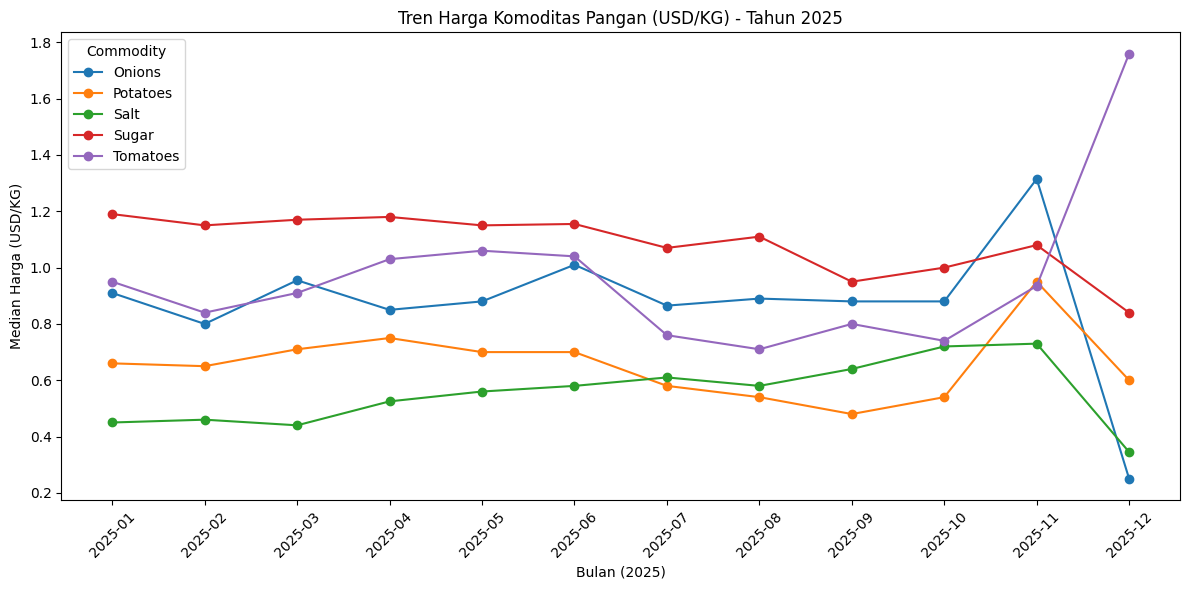

In [ ]:
# Visualisasi Plot multi-line chart
plt.figure(figsize=(12, 6))
for comm in sorted(monthly_trend["commodity"].unique()):
    sub = monthly_trend[monthly_trend["commodity"] == comm].sort_values("month")
    plt.plot(sub["month_str"], sub["median_usdprice"], marker="o", label=comm)

plt.title("Tren Harga Komoditas Pangan (USD/KG) - Tahun 2025")
plt.xlabel("Bulan (2025)")
plt.ylabel("Median Harga (USD/KG)")
plt.xticks(rotation=45)
plt.legend(title="Commodity")
plt.tight_layout()
plt.show()

In [ ]:
# Agregasi median per bulan pada level commodity-country-market
mkt_month = (
    df_kq1.groupby(["commodity", "country", "market", "month"], as_index=False)["usdprice"]
    .median()
    .rename(columns={"usdprice": "median_usdprice"})
).sort_values(["commodity", "country", "market", "month"])

# Hitung MoM change per commodity-country-market
mkt_month["prev_median_usdprice"] = (
    mkt_month.groupby(["commodity", "country", "market"])["median_usdprice"].shift(1)
)
mkt_month["mom_change"] = mkt_month["median_usdprice"] - mkt_month["prev_median_usdprice"]
mkt_month["mom_pct"] = mkt_month["mom_change"] / mkt_month["prev_median_usdprice"]

valid = mkt_month.dropna(subset=["prev_median_usdprice"]).copy()
valid["month_str"] = valid["month"].dt.strftime("%Y-%m")

# Ambil top 3 spike & top 3 drop per commodity (berdasarkan perubahan USD)
events = []
N = 3

for comm, grp in valid.groupby("commodity"):
    top_spike = grp.nlargest(N, "mom_change").copy()
    top_spike["event_type"] = "Spike (naik)"

    top_drop = grp.nsmallest(N, "mom_change").copy()
    top_drop["event_type"] = "Drop (turun)"

    events.append(pd.concat([top_spike, top_drop], ignore_index=True))

events = pd.concat(events, ignore_index=True)

# Rapikan tabel event
events_table = events[[
    "month_str", "commodity", "country", "market",
    "prev_median_usdprice", "median_usdprice", "mom_change", "mom_pct", "event_type"
]].rename(columns={
    "median_usdprice": "curr_median_usdprice"
})

events_table["prev_median_usdprice"] = events_table["prev_median_usdprice"].round(2)
events_table["curr_median_usdprice"] = events_table["curr_median_usdprice"].round(2)
events_table["mom_change"] = events_table["mom_change"].round(2)
events_table["mom_pct"] = (events_table["mom_pct"] * 100).round(1)  # jadi persen

events_table = events_table.sort_values(["commodity", "event_type", "mom_change"], ascending=[True, True, False])

display(events_table)

,month_str,commodity,country,market,prev_median_usdprice,curr_median_usdprice,mom_change,mom_pct,event_type
5,2025-05,Onions,Somalia,Borama,75.79,23.29,-52.50,-69.3,Drop (turun)
4,2025-04,Onions,Somalia,Burtinle,113.76,46.70,-67.06,-58.9,Drop (turun)
3,2025-04,Onions,Somalia,Taleex,120.22,38.55,-81.67,-67.9,Drop (turun)
0,2025-08,Onions,Sudan,Al Fashir,27.28,124.92,97.64,357.9,Spike (naik)
1,2025-09,Onions,Sudan,Al Fashir,124.92,197.86,72.94,58.4,Spike (naik)
2,2025-08,Onions,Somalia,Taleex,38.55,103.24,64.69,167.8,Spike (naik)
11,2025-05,Potatoes,Somalia,Borama,63.61,19.47,-44.14,-69.4,Drop (turun)
10,2025-04,Potatoes,Somalia,Cadale,95.07,36.72,-58.35,-61.4,Drop (turun)
9,2025-03,Potatoes,Somalia,Hobyo,158.45,59.86,-98.59,-62.2,Drop (turun)
6,2025-05,Potatoes,Somalia,Cadale,36.72,90.15,53.43,145.5,Spike (naik)


Dilihat dari chart dan tabel tersebut ada beberapa commodity yang terlihat terjadi kenaikan secara drastis dan ada juga yang langsung turun secara drastis. Langkah selanjutnya kami akan menganalisis kenapa bisa terjadi seperti itu per komoditasnya.

In [ ]:
# cek coverage Tomatoes per bulan
tom = df_kq1[df_kq1["commodity"].eq("Tomatoes")].copy()

tom["month"] = tom["date"].dt.to_period("M").dt.to_timestamp()
summary_cov = (tom.groupby("month", as_index=False)
               .agg(n_rows=("usdprice","size"),
                    n_countries=("country","nunique"),
                    n_markets=("market","nunique"),
                    median_usdprice=("usdprice","median"),
                    mean_usdprice=("usdprice","mean"))
              )
summary_cov["month_str"] = summary_cov["month"].dt.strftime("%Y-%m")
summary_cov.sort_values("month")

,month,n_rows,n_countries,n_markets,median_usdprice,mean_usdprice,month_str
0,2025-01-01,407,26,407,0.950,1.390983,2025-01
1,2025-02-01,372,23,372,0.840,1.152339,2025-02
2,2025-03-01,423,27,423,0.910,1.144938,2025-03
3,2025-04-01,391,25,391,1.030,1.301365,2025-04
4,2025-05-01,399,25,399,1.060,1.351033,2025-05
5,2025-06-01,396,25,396,1.040,1.247331,2025-06
6,2025-07-01,359,24,359,0.760,1.082861,2025-07
7,2025-08-01,355,22,355,0.710,0.940469,2025-08
8,2025-09-01,363,22,363,0.800,1.074398,2025-09
9,2025-10-01,254,17,254,0.740,1.133237,2025-10


Tomatoes terlihat naik tajam di akhir tahun. Namun setelah dicek, data Desember hanya berasal dari 1 negara (11 market) dibanding November yang mencakup 13 negara (184 market). Jadi lonjakan di Desember kemungkinan besar dipengaruhi perubahan cakupan data, bukan kenaikan harga merata di semua negara.

<Figure size 700x500 with 0 Axes>

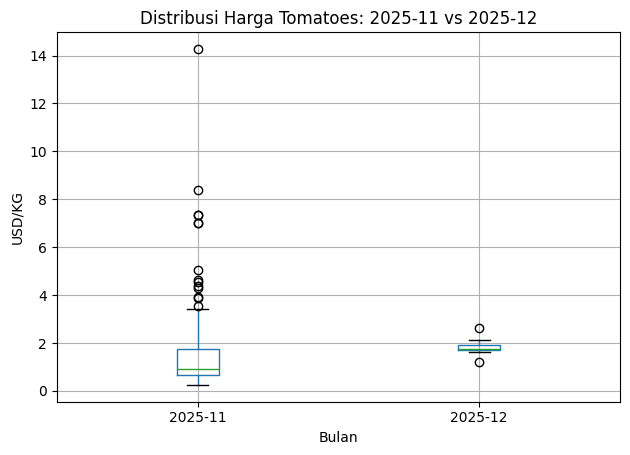

In [ ]:
# Visualisasi
tom["month_str"] = tom["month"].dt.strftime("%Y-%m")

# pilih 2 bulan terakhir yang kamu lihat: misal 2025-11 vs 2025-12
two_months = tom[tom["month_str"].isin(["2025-11","2025-12"])].copy()

# statistik ringkas
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

stats_2m = (two_months.groupby("month_str")["usdprice"]
            .agg(median="median",
                 q1=lambda s: s.quantile(0.25),
                 q3=lambda s: s.quantile(0.75),
                 iqr=iqr,
                 count="size")
           ).reset_index()
stats_2m

# boxplot
plt.figure(figsize=(7,5))
two_months.boxplot(column="usdprice", by="month_str")
plt.title("Distribusi Harga Tomatoes: 2025-11 vs 2025-12")
plt.suptitle("")
plt.xlabel("Bulan")
plt.ylabel("USD/KG")
plt.tight_layout()
plt.show()

Boxplot memperlihatkan November sangat bervariasi (banyak outlier), sedangkan Desember lebih sempit namun berada pada level yang lebih tinggi. Ini konsisten dengan temuan bahwa data Desember jauh lebih sedikit dan hanya dari satu negara.

In [ ]:
# Negara apa saja yang muncul di Tomatoes Desember?
tom_dec = tom[tom["month_str"]=="2025-12"].copy()
tom_dec["country"].value_counts()

,count
country,
Tajikistan,11


In [ ]:
# Bandingkan median Tomatoes negara yang muncul di Desember (Nov vs Dec)
dec_country = tom_dec["country"].iloc[0]

tom_country_trend = (tom[tom["country"].eq(dec_country)]
                     .groupby("month_str")["usdprice"].median()
                     .reset_index()
                    )
tom_country_trend

,month_str,usdprice
0,2025-01,1.950
1,2025-02,1.845
2,2025-03,1.840
3,2025-04,1.710
4,2025-05,1.560
5,2025-06,0.820
6,2025-07,0.450
7,2025-08,0.450
8,2025-09,0.560
9,2025-10,1.010


In [ ]:
# Fokus Tajikistan: market mana yang paling mahal di Nov & Dec?
tom_tjk = tom[tom["country"].eq("Tajikistan")].copy()

comp = (tom_tjk[tom_tjk["month_str"].isin(["2025-11","2025-12"])]
        .groupby(["month_str","market"], as_index=False)["usdprice"].median()
        .rename(columns={"usdprice":"median_usdprice"})
       )

# Top 5 market termahal per bulan
top5 = (comp.sort_values(["month_str","median_usdprice"], ascending=[True, False])
        .groupby("month_str")
        .head(5)
       )
top5

,month_str,market,median_usdprice
8,2025-11,Murghob,2.40
3,2025-11,Ishkoshim,1.69
2,2025-11,Isfara,1.38
7,2025-11,Kushoniyon,1.34
10,2025-11,Qubodiyon,1.31
19,2025-12,Murghob,2.61
17,2025-12,Khorog,2.13
14,2025-12,Isfara,1.95
12,2025-12,Gharm,1.87
13,2025-12,Hisor,1.87


**Tomatoes (akhir tahun): kenapa terlihat naik di Desember?**
- Di line chart, Tomatoes naik tajam pada **2025-12**.
- Dari sisi coverage, **data Desember hanya berasal dari 1 negara (Tajikistan) dengan 11 market**, jauh lebih sedikit dibanding November (13 negara, 184 market). Jadi tren Desember **lebih merefleksikan kondisi Tajikistan**, bukan kondisi global.
- Namun kenaikan ini juga terlihat pada level market di Tajikistan: contoh **Murghob** naik dari **2.40 (Nov)** menjadi **2.61 (Dec)**, dan beberapa market lain di Desember berada pada level harga relatif tinggi (mis. Khorog, Gharm, Hisor).
- **Hipotesis (bukan fakta):** kenaikan lokal ini dapat dipengaruhi faktor musiman, biaya distribusi, atau perubahan pasokan/permintaan di wilayah tersebut.

In [ ]:
# Cara cek penjelasan tiap commodity
def commodity_story(df_2025, commodity_name, top_n=3, focus_months=None):
    d = df_2025[df_2025["commodity"].eq(commodity_name)].copy()
    d["month"] = d["date"].dt.to_period("M").dt.to_timestamp()
    d["month_str"] = d["month"].dt.strftime("%Y-%m")

    # 1) Coverage per bulan
    cov = (d.groupby("month_str", as_index=False)
           .agg(n_rows=("usdprice","size"),
                n_countries=("country","nunique"),
                n_markets=("market","nunique"),
                median_usdprice=("usdprice","median"))
          )

    # 2) Event MoM per country-market (median)
    m = (d.groupby(["country","market","month_str"], as_index=False)["usdprice"]
         .median()
         .rename(columns={"usdprice":"median_usdprice"})
        ).sort_values(["country","market","month_str"])

    m["prev"] = m.groupby(["country","market"])["median_usdprice"].shift(1)
    m["mom_change"] = m["median_usdprice"] - m["prev"]
    m["mom_pct"] = m["mom_change"] / m["prev"]
    m = m.dropna(subset=["prev"]).copy()

    spike = m.nlargest(top_n, "mom_change").assign(event_type="Spike (naik)")
    drop  = m.nsmallest(top_n, "mom_change").assign(event_type="Drop (turun)")
    events = pd.concat([spike, drop], ignore_index=True)[
        ["month_str","country","market","prev","median_usdprice","mom_change","mom_pct","event_type"]
    ].rename(columns={"median_usdprice":"curr"})

    display(cov.sort_values("month_str"))
    display(events.sort_values(["event_type","mom_change"], ascending=[True, False]))

    # 3) Kalau mau fokus ke bulan tertentu (mis. bulan yang terlihat loncat di chart),
    # tampilkan negara/market yang dominan pada bulan itu (cek coverage shift).
    if focus_months:
        for mo in focus_months:
            sub = d[d["month_str"].eq(mo)].copy()
            if len(sub) == 0:
                continue
            print(f"\n=== Dominasi coverage {commodity_name} di bulan {mo} ===")
            display(sub["country"].value_counts().head(10))
            display(sub["market"].value_counts().head(10))

In [ ]:
# Cek Commodity:
commodity_story(df_kq1, "Onions", top_n=3, focus_months=["2025-12"])

,month_str,n_rows,n_countries,n_markets,median_usdprice
0,2025-01,384,24,384,0.910
1,2025-02,345,22,345,0.800
2,2025-03,396,24,396,0.955
3,2025-04,371,23,371,0.850
4,2025-05,377,23,377,0.880
5,2025-06,372,23,372,1.010
6,2025-07,334,21,334,0.865
7,2025-08,331,21,331,0.890
8,2025-09,341,22,341,0.880
9,2025-10,279,19,279,0.880


,month_str,country,market,prev,curr,mom_change,mom_pct,event_type
5,2025-05,Somalia,Borama,75.789474,23.288053,-52.501421,-0.692727,Drop (turun)
4,2025-04,Somalia,Burtinle,113.760000,46.700000,-67.060000,-0.589487,Drop (turun)
3,2025-04,Somalia,Taleex,120.220000,38.550000,-81.670000,-0.679338,Drop (turun)
0,2025-08,Sudan,Al Fashir,27.280000,124.920000,97.640000,3.579179,Spike (naik)
1,2025-09,Sudan,Al Fashir,124.920000,197.860000,72.940000,0.583894,Spike (naik)
2,2025-08,Somalia,Taleex,38.550000,103.240000,64.690000,1.678080,Spike (naik)



=== Dominasi coverage Onions di bulan 2025-12 ===


,count
country,
Tajikistan,11


,count
market,
Hisor,1
Gharm,1
Murghob,1
Bokhtar,1
Kulob,1
Qubodiyon,1
Kushoniyon,1
Isfara,1
Istaravshan,1


Fluktuasi ekstrem Onions (spike/drop) terutama bersifat lokal (Somalia & Sudan) berdasarkan tabel event, sedangkan penurunan tajam di Desember pada tren global perlu dibaca hati-hati karena coverage Desember hanya Tajikistan.

In [ ]:
commodity_story(df_kq1, "Potatoes", top_n=3, focus_months=["2025-12"])

,month_str,n_rows,n_countries,n_markets,median_usdprice
0,2025-01,327,27,327,0.66
1,2025-02,296,25,296,0.65
2,2025-03,313,27,313,0.71
3,2025-04,302,24,302,0.75
4,2025-05,319,26,319,0.70
5,2025-06,299,25,299,0.70
6,2025-07,257,21,257,0.58
7,2025-08,277,23,277,0.54
8,2025-09,248,21,248,0.48
9,2025-10,222,20,222,0.54


,month_str,country,market,prev,curr,mom_change,mom_pct,event_type
5,2025-05,Somalia,Borama,63.611105,19.468018,-44.143088,-0.693953,Drop (turun)
4,2025-04,Somalia,Cadale,95.070000,36.720000,-58.350000,-0.613758,Drop (turun)
3,2025-03,Somalia,Hobyo,158.450000,59.860000,-98.590000,-0.622215,Drop (turun)
0,2025-05,Somalia,Cadale,36.720000,90.150000,53.430000,1.455065,Spike (naik)
1,2025-04,Somalia,Borama,14.035088,63.611105,49.576018,3.532291,Spike (naik)
2,2025-06,Somalia,Garowe,31.060000,68.550000,37.490000,1.207019,Spike (naik)



=== Dominasi coverage Potatoes di bulan 2025-12 ===


,count
country,
Tajikistan,12
Moldova,1


,count
market,
Ribnita,1
Hisor,1
Gharm,1
Ishkoshim,1
Khorog,1
Murghob,1
Bokhtar,1
Kulob,1
Jayhun,1


Fluktuasi terbesar Potatoes terjadi pada market-market Somalia (lihat event MoM), sedangkan perubahan di Desember pada tren global bisa dipengaruhi keterbatasan coverage (mayoritas data hanya Tajikistan).

In [ ]:
commodity_story(df_kq1, "Salt", top_n=3, focus_months=["2025-12"])

,month_str,n_rows,n_countries,n_markets,median_usdprice
0,2025-01,483,26,483,0.450
1,2025-02,554,27,554,0.460
2,2025-03,515,25,515,0.440
3,2025-04,412,26,412,0.525
4,2025-05,407,25,407,0.560
5,2025-06,429,24,428,0.580
6,2025-07,399,22,397,0.610
7,2025-08,384,24,383,0.580
8,2025-09,373,21,365,0.640
9,2025-10,390,17,376,0.720


,month_str,country,market,prev,curr,mom_change,mom_pct,event_type
5,2025-04,Somalia,Taleex,49.30,21.35,-27.95,-0.566937,Drop (turun)
4,2025-08,Somalia,Cadale,71.63,25.37,-46.26,-0.645819,Drop (turun)
3,2025-04,Somalia,Cadale,72.05,16.96,-55.09,-0.764608,Drop (turun)
0,2025-05,Somalia,Cadale,16.96,68.94,51.98,3.064858,Spike (naik)
1,2025-11,Somalia,Bakaara,17.89,47.74,29.85,1.668530,Spike (naik)
2,2025-08,Somalia,Ceel Waaq,21.41,50.31,28.90,1.349837,Spike (naik)



=== Dominasi coverage Salt di bulan 2025-12 ===


,count
country,
Afghanistan,25
Tajikistan,9
Rwanda,8


,count
market,
Badghis,1
Balkh,1
Farah,1
Faryab,1
Ghazni,1
Ghor,1
Hilmand,1
Hirat,1
Jawzjan,1


Salt menunjukkan tren naik sampai Nov, tetapi drop di Desember perlu dibaca bersama coverage yang didominasi Afghanistan. Event ekstrem Salt juga banyak terjadi pada market Somalia, menandakan volatilitas lokal.

In [ ]:
commodity_story(df_kq1, "Sugar", top_n=3, focus_months=["2025-12"])

,month_str,n_rows,n_countries,n_markets,median_usdprice
0,2025-01,569,33,569,1.190
1,2025-02,522,33,522,1.150
2,2025-03,653,35,653,1.170
3,2025-04,506,33,506,1.180
4,2025-05,534,32,534,1.150
5,2025-06,530,34,530,1.155
6,2025-07,417,31,417,1.070
7,2025-08,432,30,432,1.110
8,2025-09,331,29,331,0.950
9,2025-10,313,24,313,1.000


,month_str,country,market,prev,curr,mom_change,mom_pct,event_type
5,2025-08,Yemen,Marib City - Al mujmaa,11.74,7.11,-4.63,-0.394378,Drop (turun)
4,2025-10,Sudan,Kadugli,74.95,32.21,-42.74,-0.570247,Drop (turun)
3,2025-09,Palestine,Gaza Strip,91.37,3.91,-87.46,-0.957207,Drop (turun)
0,2025-06,Sudan,Al Fashir,59.95,123.14,63.19,1.054045,Spike (naik)
1,2025-08,Sudan,Kadugli,24.57,74.95,50.38,2.050468,Spike (naik)
2,2025-05,Sudan,Al Fashir,23.38,59.95,36.57,1.564157,Spike (naik)



=== Dominasi coverage Sugar di bulan 2025-12 ===


,count
country,
Afghanistan,28
Tajikistan,10
Moldova,2


,count
market,
Badakhshan,1
Baghlan,1
Balkh,1
Daykundi,1
Farah,1
Faryab,1
Ghazni,1
Ghor,1
Hilmand,1


Sugar relatif stabil di banyak bulan, namun event MoM menunjukkan shock besar pada market tertentu (Sudan dan Palestine/Gaza). Desember cenderung turun, tetapi komposisi data Desember didominasi Afghanistan.

### Insight KQ1 (2025) — Tren dan Event Spike/Drop

- Secara umum, tren median harga 2025 berbeda antar komoditas; beberapa stabil (mis. Sugar), sementara yang lain lebih fluktuatif (Onions, Potatoes, Salt) pada bulan-bulan tertentu.
- Event spike/drop terbesar pada level country–market menunjukkan fluktuasi tajam sering bersifat **lokal**, bukan selalu “tren global”.
- **Onions**: event ekstrem banyak muncul di Somalia (drop 2025-04/05) dan Sudan (spike 2025-08/09). Namun penurunan tajam di **2025-12** perlu dibaca hati-hati karena coverage Desember hanya **1 negara (Tajikistan, 11 market)**.
- **Potatoes**: event ekstrem terkonsentrasi di Somalia (drop 2025-03/04/05 dan spike 2025-04/05/06). Perubahan tren di **2025-12** juga berisiko bias karena coverage sangat kecil dan didominasi **Tajikistan**.
- **Salt**: tren cenderung naik hingga Nov, lalu turun di Desember. Coverage Desember masih mencakup 3 negara, namun didominasi Afghanistan sehingga perubahan akhir tahun bisa dipengaruhi komposisi data.
- **Sugar**: relatif stabil sepanjang tahun, tetapi tabel event menunjukkan shock lokal besar (spike di Sudan; drop besar di Palestine/Gaza). Desember turun dengan coverage 3 negara yang didominasi Afghanistan.
- **Tomatoes**: lonjakan pada bulan Desember dipengaruhi oleh coverage shift (Desember hanya Tajikistan), namun di Tajikistan sendiri juga terjadi kenaikan Nov→Dec; jadi ini lebih tepat disebut kenaikan **lokal**, bukan global.
- Hipotesis : pola spike/drop lokal bisa berkaitan dengan musim panen, gangguan distribusi/logistik, adanya konflik, atau kondisi akses pasar di wilayah tertentu.

# 2. Bagaimana persebaran harga per komoditas secara global

In [ ]:
df_kq2 = df.copy()
df_kq2["date"] = pd.to_datetime(df_kq2["date"], errors="coerce")

# 1) Hitung "harga rata-rata commodity per market" (level: commodity-country-market)
market_avg = (
    df_kq2.groupby(["commodity", "country", "market"], as_index=False)["usdprice"]
    .mean()
    .rename(columns={"usdprice": "avg_usdprice_market"})
)

In [ ]:
# 2) Ringkasan statistik per commodity: median, Q1, Q3, IQR
summary_stats = (
    market_avg.groupby("commodity")["avg_usdprice_market"]
    .agg(
        count_markets="size",
        median="median",
        q1=lambda s: s.quantile(0.25),
        q3=lambda s: s.quantile(0.75),
        mean="mean"
    )
    .reset_index()
)
summary_stats["IQR"] = summary_stats["q3"] - summary_stats["q1"]
summary_stats = summary_stats.sort_values("median", ascending=False)

# Tampilkan tabel ringkasan
display(summary_stats)

,commodity,count_markets,median,q1,q3,mean,IQR
3,Sugar,1086,1.240000,0.980357,1.484750,1.538761,0.504393
4,Tomatoes,666,1.060909,0.610000,1.575000,1.264507,0.965000
0,Onions,622,1.035000,0.521705,1.517944,4.440687,0.996240
1,Potatoes,467,0.677143,0.443643,1.219000,4.353657,0.775357
2,Salt,1031,0.520000,0.405000,0.883750,1.480052,0.478750


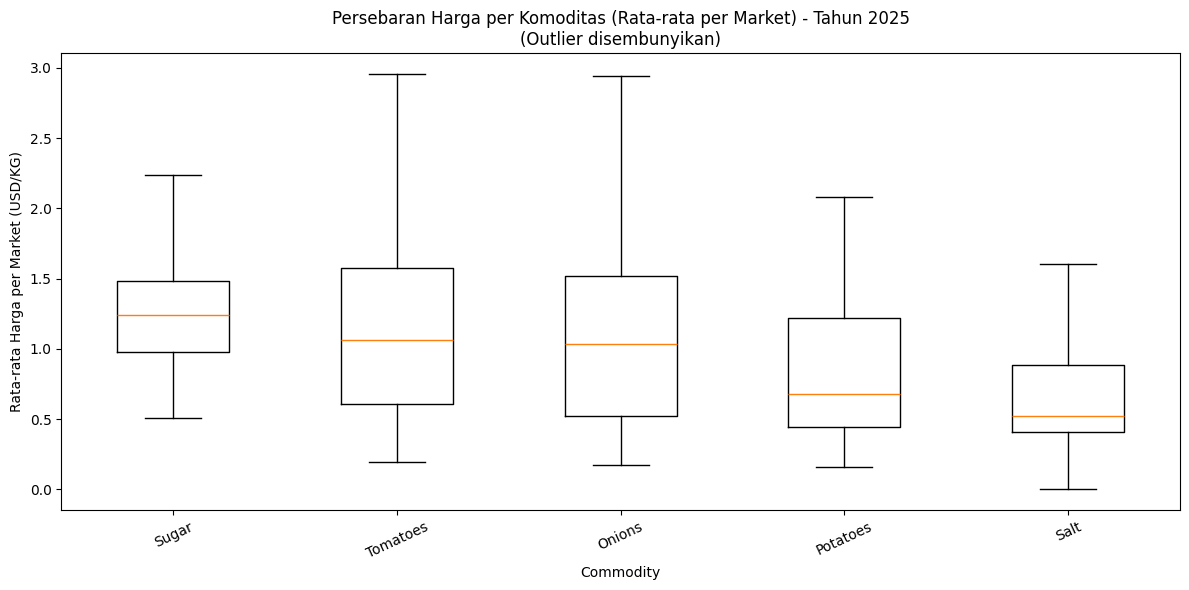

In [ ]:
# 3) Boxplot per commodity
# Boxplot tanpa menampilkan titik outlier
commodities = summary_stats["commodity"].tolist()  # urut sesuai median tertinggi -> terendah
data = [
    market_avg.loc[market_avg["commodity"].eq(c), "avg_usdprice_market"].dropna().values
    for c in commodities
]

plt.figure(figsize=(12, 6))
plt.boxplot(data, tick_labels=commodities, showfliers=False)  # outlier point disembunyikan
plt.title("Persebaran Harga per Komoditas (Rata-rata per Market) - Tahun 2025\n(Outlier disembunyikan)")
plt.xlabel("Commodity")
plt.ylabel("Rata-rata Harga per Market (USD/KG)")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

Outlier disembunyikan agar terlihat rapi dan mudah dipahami.

#### Insight KQ2

1. Urutan harga “tipikal” (median) antar komoditas terlihat jelas

- Sugar punya median tertinggi → secara umum gula cenderung lebih mahal dibanding komoditas lain pada mayoritas market.

- Tomatoes dan Onions berada di level menengah (median sekitar 1 USD/kg-an).

- Potatoes lebih murah dibanding tiga di atasnya.

- Salt memiliki median terendah → secara umum garam paling murah di mayoritas market.

2. Perbedaan kestabilan harga antar komoditas (lihat lebar box/IQR)

- Tomatoes dan Onions terlihat punya sebaran (IQR) lebih lebar → harga antar market lebih bervariasi (lebih “tidak stabil” antar lokasi).

- Salt box-nya relatif paling sempit → harga garam antar market cenderung lebih konsisten.

- Sugar relatif tinggi median-nya, dengan sebaran sedang → mahalnya cukup “konsisten” di banyak market.

3. Manfaat dalam bisnis

- Komoditas dengan IQR lebar (tomatoes/onions) mempunyai peluang untuk “shopping around” (pilih market/area tertentu) biasanya lebih besar karena variasi harga antar market tinggi.

- Sedangkan komoditas dengan IQR sempit (salt) jika memilih market yang beda, kemungkinannya tidak banyak mengubah harga.

# 3. Apakah terdapat perbedaan harga yang signifikan antar pasar (market) di dalam satu negara yang sama?

In [ ]:
df_kq3 = df.copy()
df_kq3["date"] = pd.to_datetime(df_kq3["date"], errors="coerce")

# 1) Agregasi PER COMMODITY: rata-rata harga per market (level: commodity-country-market)
market_avg_comm = (
    df_kq3.groupby(["commodity", "countryiso3", "country", "market"], as_index=False)["usdprice"]
    .mean()
    .rename(columns={"usdprice": "avg_usdprice_market"})
)

# 2) Untuk tiap commodity, ambil Top 5 negara dengan jumlah market terbanyak
top5_by_comm = (
    market_avg_comm.groupby(["commodity", "countryiso3", "country"])["market"]
    .nunique()
    .reset_index(name="n_markets")
)

top5_by_comm = (
    top5_by_comm.sort_values(["commodity", "n_markets"], ascending=[True, False])
    .groupby("commodity")
    .head(5)
)

In [ ]:
# 3) Statistik ringkas untuk membantu interpretasi (median & IQR per negara per commodity)
def iqr(s):
    return s.quantile(0.75) - s.quantile(0.25)

stats_kq3 = (
    market_avg_comm.merge(top5_by_comm[["commodity","countryiso3","country"]], on=["commodity","countryiso3","country"], how="inner")
    .groupby(["commodity", "countryiso3", "country"])["avg_usdprice_market"]
    .agg(
        n_markets="size",
        median="median",
        q1=lambda s: s.quantile(0.25),
        q3=lambda s: s.quantile(0.75),
        IQR=iqr
    )
    .reset_index()
)

display(top5_by_comm.sort_values(["commodity","n_markets"], ascending=[True, False]))

,commodity,countryiso3,country,n_markets
19,Onions,SYR,Syrian Arab Republic,73
1,Onions,BDI,Burundi,70
2,Onions,CMR,Cameroon,44
5,Onions,GNB,Guinea-Bissau,42
12,Onions,MLI,Mali,39
47,Potatoes,SYR,Syrian Arab Republic,73
52,Potatoes,VEN,Venezuela,41
27,Potatoes,CMR,Cameroon,37
46,Potatoes,SOM,Somalia,35
43,Potatoes,MOZ,Mozambique,33


In [ ]:
display(stats_kq3.sort_values(["commodity","IQR"], ascending=[True, False]))

,commodity,countryiso3,country,n_markets,median,q1,q3,IQR
1,Onions,CMR,Cameroon,44,0.850536,0.573500,1.113854,0.540354
3,Onions,MLI,Mali,39,0.910000,0.740000,1.152500,0.412500
2,Onions,GNB,Guinea-Bissau,42,1.325000,1.151250,1.485000,0.333750
0,Onions,BDI,Burundi,70,1.374545,1.252500,1.512333,0.259833
4,Onions,SYR,Syrian Arab Republic,73,0.337778,0.284000,0.381250,0.097250
7,Potatoes,SOM,Somalia,35,50.038182,32.476566,57.743889,25.267323
6,Potatoes,MOZ,Mozambique,33,1.030000,0.790000,1.225000,0.435000
9,Potatoes,VEN,Venezuela,41,1.506667,1.275000,1.647500,0.372500
5,Potatoes,CMR,Cameroon,37,0.520000,0.400000,0.660000,0.260000
8,Potatoes,SYR,Syrian Arab Republic,73,0.335714,0.308571,0.376000,0.067429


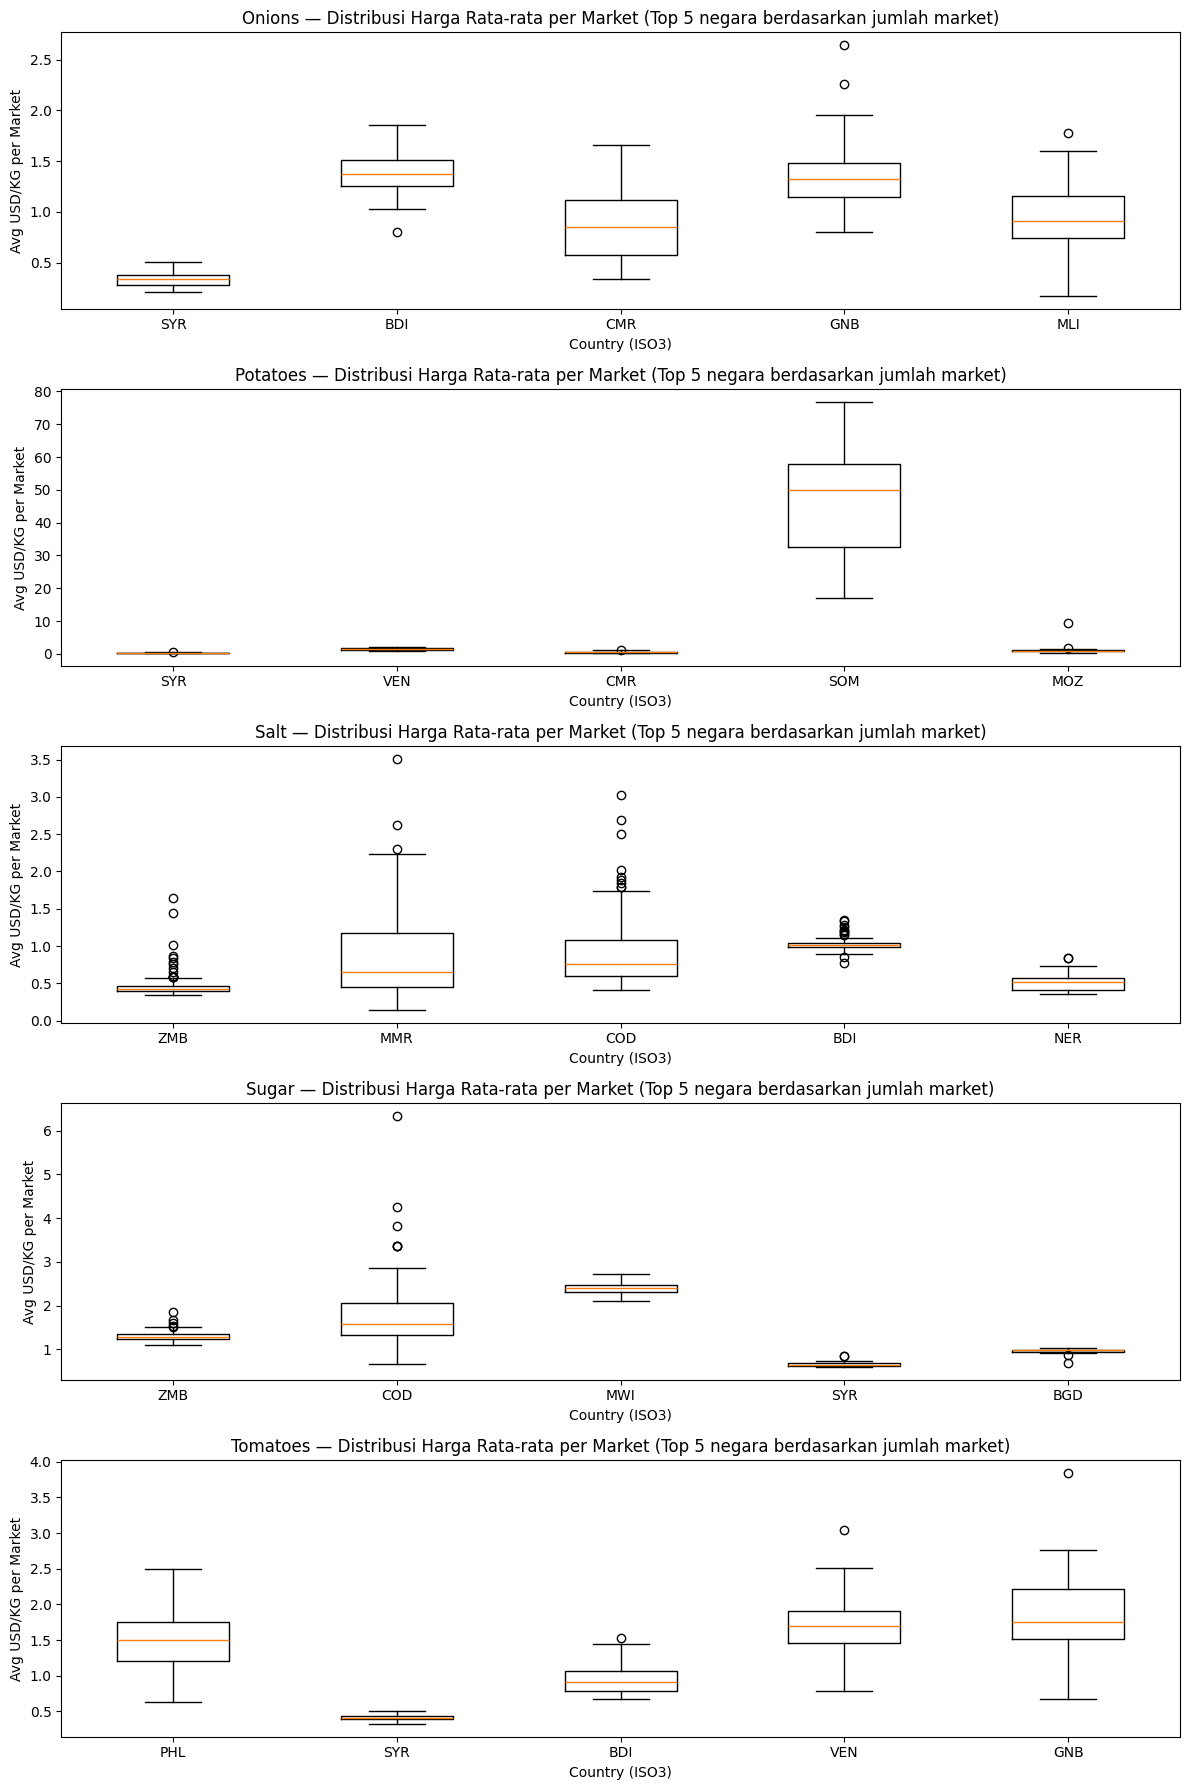

In [ ]:
# 4) Visual: 5 subplot (1 panel per commodity)
commodities = sorted(market_avg_comm["commodity"].unique())

fig, axes = plt.subplots(nrows=len(commodities), ncols=1, figsize=(12, 18), sharey=False)

if len(commodities) == 1:
    axes = [axes]

for ax, comm in zip(axes, commodities):
    # negara top 5 untuk commodity ini
    top_c = top5_by_comm[top5_by_comm["commodity"].eq(comm)].sort_values("n_markets", ascending=False)
    countries = top_c["countryiso3"].tolist()
    labels = [f"{r.countryiso3}" for r in top_c.itertuples()]

    sub = market_avg_comm[market_avg_comm["commodity"].eq(comm)].copy()
    sub = sub[sub["countryiso3"].isin(countries)].copy()

    data = [sub.loc[sub["countryiso3"].eq(c), "avg_usdprice_market"].dropna().values for c in countries]

    ax.boxplot(data, tick_labels=labels, showfliers=True)
    ax.set_title(f"{comm} — Distribusi Harga Rata-rata per Market (Top 5 negara berdasarkan jumlah market)")
    ax.set_xlabel("Country (ISO3)")
    ax.set_ylabel("Avg USD/KG per Market")
    ax.tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

### Insight KQ3
1) Onions

Variasi antar market terbesar untuk Onions di Top 5 negara terlihat pada Cameroon (CMR) dengan IQR ≈ 0.540 (paling lebar), artinya harga Onions antar market di Cameroon lebih “tidak merata”.

Median tertinggi ada pada Burundi (BDI) ≈ 1.375 dan Guinea-Bissau (GNB) ≈ 1.325, sedangkan Syria (SYR) paling rendah (median ≈ 0.338) dan juga paling stabil (IQR ≈ 0.097).

2) Potatoes

Somalia (SOM) sangat menonjol: median ≈ 50.04 dan IQR ≈ 25.27 → ini menunjukkan harga Potatoes jauh lebih tinggi dan sangat bervariasi antar market dibanding negara lain di panel (yang median-nya sekitar < 2).

Negara lain seperti Syria (SYR) punya median rendah (≈ 0.336) dan variasi kecil (IQR ≈ 0.067), jadi lebih stabil antar market.

3) Salt

Myanmar (MMR) punya variasi antar market paling besar di panel Salt (IQR ≈ 0.725), disusul DR Congo (COD) IQR ≈ 0.471 → indikasi ketimpangan harga Salt antar market lebih tinggi di negara tersebut.

Burundi (BDI) punya median tertinggi (≈ 1.014) tetapi variasinya kecil (IQR ≈ 0.064) → harga cenderung tinggi namun relatif konsisten antar market.

4) Sugar

Variasi terbesar ada di DR Congo (COD) dengan IQR ≈ 0.744 dan adanya banyak outlier → Sugar di COD lebih tidak merata antar market.

Malawi (MWI) punya median tertinggi (≈ 2.397) dengan variasi relatif kecil (IQR ≈ 0.163) → artinya Sugar di Malawi cenderung mahal tetapi lebih konsisten antar market.

5) Tomatoes

Guinea-Bissau (GNB) menunjukkan variasi terbesar (IQR ≈ 0.697) dan juga median tinggi (≈ 1.76) → Tomatoes di GNB tidak hanya mahal, tapi juga lebih tidak merata antar market.

Syria (SYR) paling rendah dan paling stabil (median ≈ 0.41; IQR ≈ 0.048) dibanding negara lain di panel Tomatoes.

# 4. Negara mana yang memiliki harga rata-rata pangan termahal dan termurah (USD)?

In [ ]:
df_kq4 = df.copy()
df_kq4["date"] = pd.to_datetime(df_kq4["date"], errors="coerce")

TOP_N = 5

# Ringkas per market dulu: avg price per commodity-country-market
market_avg = (
    df_kq4.groupby(["commodity", "countryiso3", "country", "market"], as_index=False)["usdprice"]
    .mean()
    .rename(columns={"usdprice": "avg_usdprice_market"})
)

# Agregasi ke level NEGARA per commodity (pakai median/mean dari market-average)
# menggunakan median agar lebih robust terhadap outlier market ekstrem.
country_rank = (
    market_avg.groupby(["commodity", "countryiso3", "country"], as_index=False)
    .agg(
        n_markets=("market", "nunique"),
        country_median_price=("avg_usdprice_market", "median"),
        country_mean_price=("avg_usdprice_market", "mean"),
    )
)

# Ambil Top N & Bottom N per commodity berdasarkan median
topN = (
    country_rank.sort_values(["commodity", "country_median_price"], ascending=[True, False])
    .groupby("commodity")
    .head(TOP_N)
    .assign(rank_type="TOP (mahal)")
)

bottomN = (
    country_rank.sort_values(["commodity", "country_median_price"], ascending=[True, True])
    .groupby("commodity")
    .head(TOP_N)
    .assign(rank_type="BOTTOM (murah)")
)

# Tabel output
display(topN.sort_values(["commodity", "country_median_price"], ascending=[True, False]))

,commodity,countryiso3,country,n_markets,country_median_price,country_mean_price,rank_type
17,Onions,SOM,Somalia,35,55.890000,57.215201,TOP (mahal)
7,Onions,IRN,Iran,1,8.658000,8.658000,TOP (mahal)
25,Onions,YEM,Yemen,11,3.761000,4.084668,TOP (mahal)
15,Onions,SDN,Sudan,18,3.504250,6.565294,TOP (mahal)
21,Onions,TLS,Timor-Leste,11,2.850000,2.913946,TOP (mahal)
46,Potatoes,SOM,Somalia,35,50.038182,46.152652,TOP (mahal)
36,Potatoes,IRN,Iran,1,11.501111,11.501111,TOP (mahal)
53,Potatoes,YEM,Yemen,11,7.216667,7.265819,TOP (mahal)
28,Potatoes,COD,Democratic Republic of the Congo,3,2.020000,2.291389,TOP (mahal)
52,Potatoes,VEN,Venezuela,41,1.506667,1.481671,TOP (mahal)


In [ ]:
display(bottomN.sort_values(["commodity", "country_median_price"], ascending=[True, True]))

,commodity,countryiso3,country,n_markets,country_median_price,country_mean_price,rank_type
22,Onions,TUR,Türkiye,1,0.291667,0.291667,BOTTOM (murah)
20,Onions,TJK,Tajikistan,15,0.299000,0.344355,BOTTOM (murah)
6,Onions,IND,India,5,0.323000,0.354067,BOTTOM (murah)
19,Onions,SYR,Syrian Arab Republic,73,0.337778,0.339376,BOTTOM (murah)
10,Onions,KGZ,Kyrgyzstan,18,0.394444,0.396861,BOTTOM (murah)
45,Potatoes,RWA,Rwanda,25,0.257500,0.260939,BOTTOM (murah)
35,Potatoes,IND,India,5,0.293333,0.296929,BOTTOM (murah)
47,Potatoes,SYR,Syrian Arab Republic,73,0.335714,0.341609,BOTTOM (murah)
50,Potatoes,TUR,Türkiye,1,0.451429,0.451429,BOTTOM (murah)
33,Potatoes,ETH,Ethiopia,15,0.476667,0.481973,BOTTOM (murah)


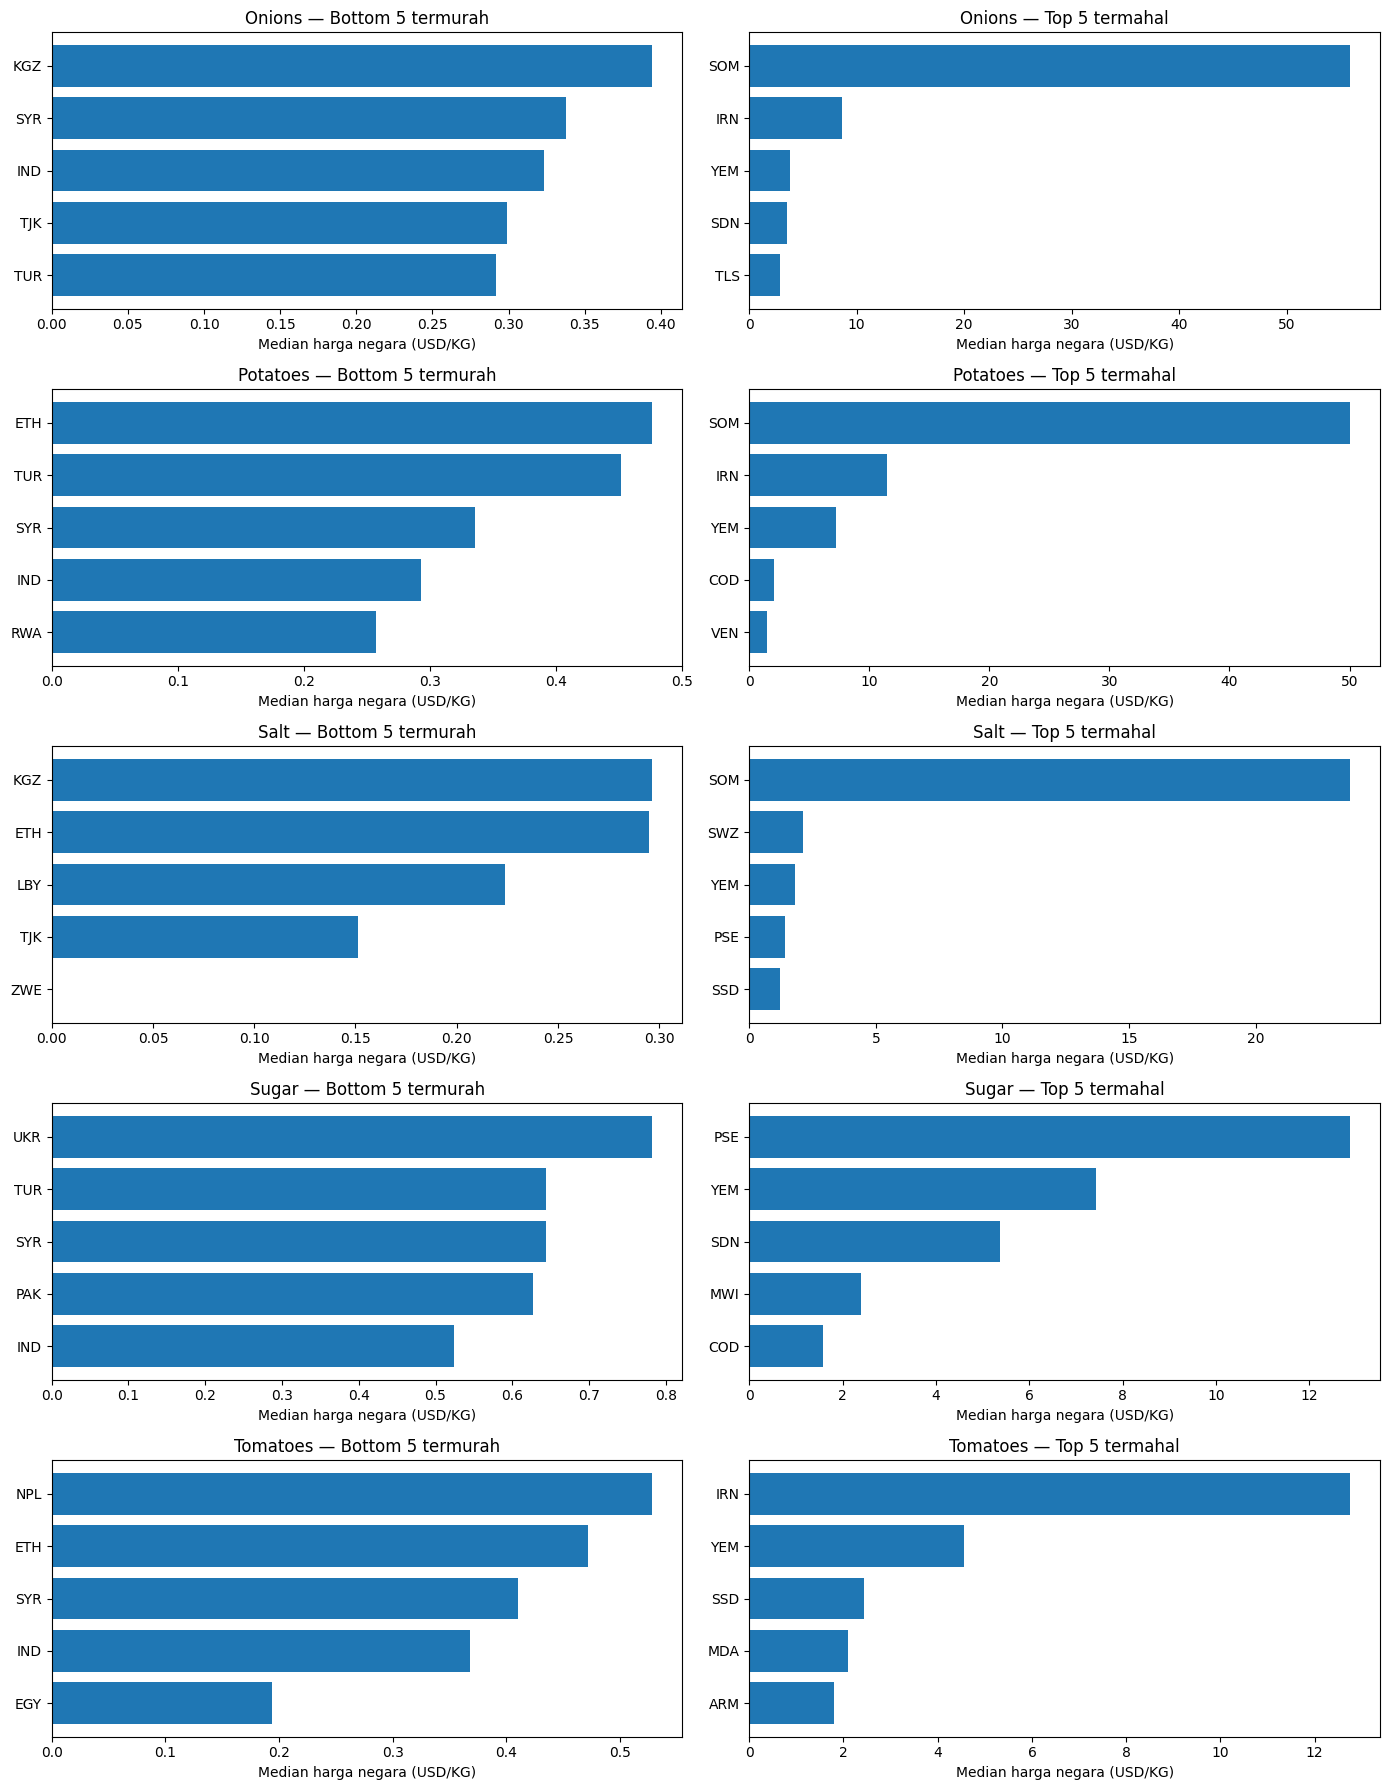

In [ ]:
# Visualisasi
# Ranking bar per commodity: Top & Bottom (dalam 1 figure: 5 rows x 2 cols)
commodities = sorted(country_rank["commodity"].unique())
fig, axes = plt.subplots(nrows=len(commodities), ncols=2, figsize=(14, 18), sharex=False)

if len(commodities) == 1:
    axes = np.array([axes])

for i, comm in enumerate(commodities):
    top_c = topN[topN["commodity"].eq(comm)].sort_values("country_median_price", ascending=True)
    bot_c = bottomN[bottomN["commodity"].eq(comm)].sort_values("country_median_price", ascending=True)

    # Left: Bottom (murah)
    axL = axes[i, 0]
    axL.barh(bot_c["countryiso3"], bot_c["country_median_price"])
    axL.set_title(f"{comm} — Bottom {TOP_N} termurah")
    axL.set_xlabel("Median harga negara (USD/KG)")

    # Right: Top (mahal)
    axR = axes[i, 1]
    axR.barh(top_c["countryiso3"], top_c["country_median_price"])
    axR.set_title(f"{comm} — Top {TOP_N} termahal")
    axR.set_xlabel("Median harga negara (USD/KG)")

plt.tight_layout()
plt.show()

In [ ]:
TOP_N = 5          # Top/Bottom N per commodity
SHOW_K = 10        # berapa negara ditampilkan di chart frekuensi
PRICE_COL = "country_median_price"  # pakai median (robust)

# Validasi Kolom
required_cols = {"commodity", "countryiso3", "country", PRICE_COL}
missing = required_cols - set(country_rank.columns)
if missing:
    raise ValueError(f"Kolom wajib tidak ditemukan di country_rank: {missing}")

# buang baris tanpa harga
cr = country_rank.dropna(subset=[PRICE_COL]).copy()

# 1) BUAT RANKING TOP & BOTTOM PER COMMODITY
topN = (
    cr.sort_values(["commodity", PRICE_COL], ascending=[True, False])
      .groupby("commodity", as_index=False, group_keys=False)
      .head(TOP_N)
      .copy()
)
topN["rank_type"] = "TOP (mahal)"

bottomN = (
    cr.sort_values(["commodity", PRICE_COL], ascending=[True, True])
      .groupby("commodity", as_index=False, group_keys=False)
      .head(TOP_N)
      .copy()
)
bottomN["rank_type"] = "BOTTOM (murah)"

country_rank_tb = pd.concat([topN, bottomN], ignore_index=True)

display(country_rank_tb.sort_values(["commodity", "rank_type", PRICE_COL], ascending=[True, True, True]).head(20))

,commodity,countryiso3,country,n_markets,country_median_price,country_mean_price,rank_type
25,Onions,TUR,Türkiye,1,0.291667,0.291667,BOTTOM (murah)
26,Onions,TJK,Tajikistan,15,0.299000,0.344355,BOTTOM (murah)
27,Onions,IND,India,5,0.323000,0.354067,BOTTOM (murah)
28,Onions,SYR,Syrian Arab Republic,73,0.337778,0.339376,BOTTOM (murah)
29,Onions,KGZ,Kyrgyzstan,18,0.394444,0.396861,BOTTOM (murah)
4,Onions,TLS,Timor-Leste,11,2.850000,2.913946,TOP (mahal)
3,Onions,SDN,Sudan,18,3.504250,6.565294,TOP (mahal)
2,Onions,YEM,Yemen,11,3.761000,4.084668,TOP (mahal)
1,Onions,IRN,Iran,1,8.658000,8.658000,TOP (mahal)
0,Onions,SOM,Somalia,35,55.890000,57.215201,TOP (mahal)


In [ ]:
# 2) FREKUENSI KEMUNCULAN NEGARA DI TOP vs BOTTOM (lintas commodity)
top_freq = (
    country_rank_tb[country_rank_tb["rank_type"].str.contains("TOP", case=False)]
    .groupby(["countryiso3", "country"], as_index=False)
    .size()
    .rename(columns={"size": "top_appearances"})
)

bottom_freq = (
    country_rank_tb[country_rank_tb["rank_type"].str.contains("BOTTOM", case=False)]
    .groupby(["countryiso3", "country"], as_index=False)
    .size()
    .rename(columns={"size": "bottom_appearances"})
)

freq = (
    top_freq.merge(bottom_freq, on=["countryiso3", "country"], how="outer")
    .fillna(0)
)

freq["top_appearances"] = freq["top_appearances"].astype(int)
freq["bottom_appearances"] = freq["bottom_appearances"].astype(int)
freq["total_appearances"] = freq["top_appearances"] + freq["bottom_appearances"]

freq = freq.sort_values("total_appearances", ascending=False)
display(freq)

,countryiso3,country,top_appearances,bottom_appearances,total_appearances
24,YEM,Yemen,5,0,5
4,IND,India,0,4,4
18,SYR,Syrian Arab Republic,0,4,4
15,SOM,Somalia,3,0,3
5,IRN,Iran,3,0,3
3,ETH,Ethiopia,0,3,3
21,TUR,Türkiye,0,3,3
1,COD,Democratic Republic of the Congo,2,0,2
6,KGZ,Kyrgyzstan,0,2,2
19,TJK,Tajikistan,0,2,2


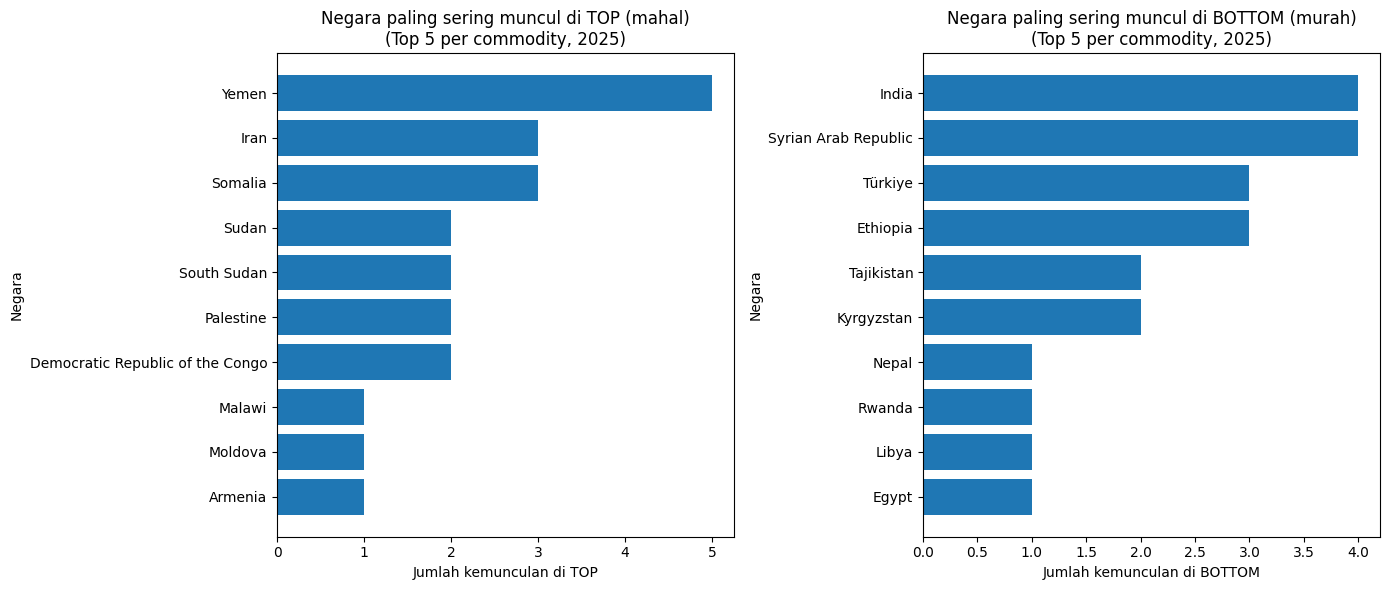

In [ ]:
# 3) CHART FREKUENSI: DIPISAH TOP vs BOTTOM
freq_top = top_freq.sort_values("top_appearances", ascending=False).head(SHOW_K).sort_values("top_appearances", ascending=True)
freq_bot = bottom_freq.sort_values("bottom_appearances", ascending=False).head(SHOW_K).sort_values("bottom_appearances", ascending=True)

fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

axes[0].barh(freq_top["country"], freq_top["top_appearances"])
axes[0].set_title(f"Negara paling sering muncul di TOP (mahal)\n(Top {TOP_N} per commodity, 2025)")
axes[0].set_xlabel("Jumlah kemunculan di TOP")
axes[0].set_ylabel("Negara")

axes[1].barh(freq_bot["country"], freq_bot["bottom_appearances"])
axes[1].set_title(f"Negara paling sering muncul di BOTTOM (murah)\n(Top {TOP_N} per commodity, 2025)")
axes[1].set_xlabel("Jumlah kemunculan di BOTTOM")
axes[1].set_ylabel("Negara")

plt.tight_layout()
plt.show()

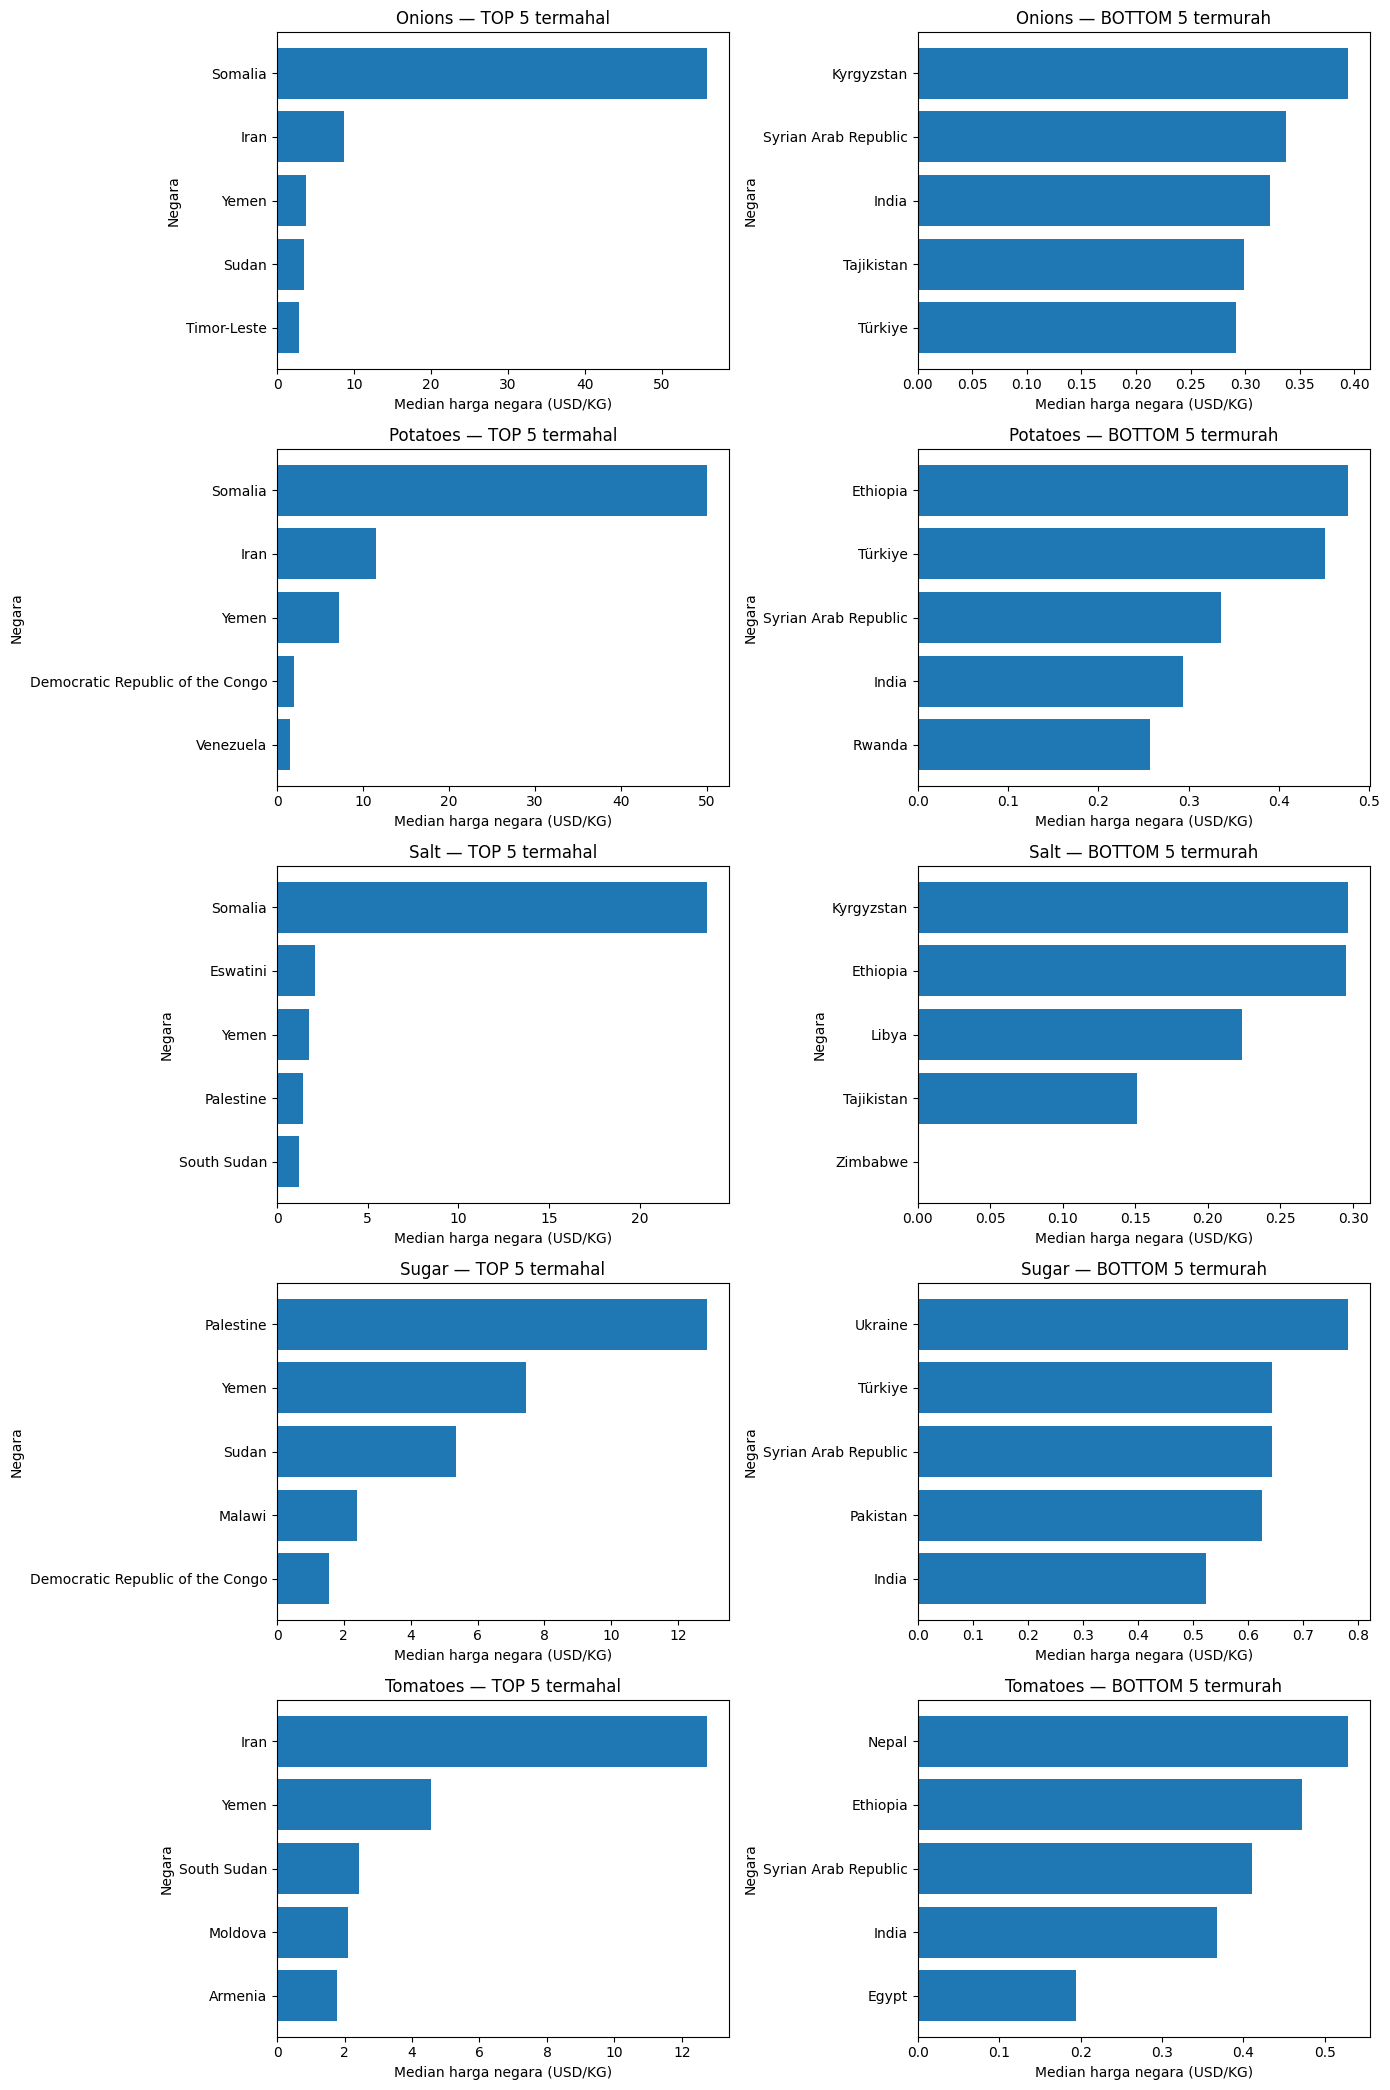

In [ ]:
# 4) PLOT PER COMMODITY: 2 KOLOM (TOP vs BOTTOM)
commodities = sorted(country_rank_tb["commodity"].unique())
n = len(commodities)

fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(14, 4.2 * n))
if n == 1:
    axes = np.array([axes])

for i, comm in enumerate(commodities):
    ax_top = axes[i, 0]
    ax_bot = axes[i, 1]

    d_top = country_rank_tb[(country_rank_tb["commodity"] == comm) & (country_rank_tb["rank_type"] == "TOP (mahal)")].copy()
    d_bot = country_rank_tb[(country_rank_tb["commodity"] == comm) & (country_rank_tb["rank_type"] == "BOTTOM (murah)")].copy()

    d_top = d_top.sort_values(PRICE_COL, ascending=True)
    d_bot = d_bot.sort_values(PRICE_COL, ascending=True)

    ax_top.barh(d_top["country"], d_top[PRICE_COL])
    ax_top.set_title(f"{comm} — TOP {TOP_N} termahal")
    ax_top.set_xlabel("Median harga negara (USD/KG)")
    ax_top.set_ylabel("Negara")

    ax_bot.barh(d_bot["country"], d_bot[PRICE_COL])
    ax_bot.set_title(f"{comm} — BOTTOM {TOP_N} termurah")
    ax_bot.set_xlabel("Median harga negara (USD/KG)")
    ax_bot.set_ylabel("Negara")

plt.tight_layout()
plt.show()

#### Insight KQ4 — Negara termahal & termurah (USD) per komoditas (2025)
1) Ada “negara langganan mahal” yang konsisten muncul di TOP

Dari chart frekuensi (Top/Bottom appearances), Yemen (YEM) paling sering muncul di TOP (mahal) dengan 5 kemunculan. Ini sinyal kuat bahwa untuk beberapa komoditas, harga median di Yemen cenderung tinggi dibanding negara lain.

Selain itu:

- Somalia (SOM) juga sering masuk TOP (3 kemunculan) dan bahkan menjadi outlier ekstrem pada beberapa komoditas:

- Onions: Somalia ~55.89 USD/kg (jauh di atas negara lain)

- Potatoes: Somalia ~50.04 USD/kg

- Salt: Somalia ~23.72 USD/kg
Ini bukan sekadar “lebih mahal”, tapi skala harganya jauh berbeda sehingga terlihat adanya outlier. Beberapa negara yang ada outlier biasanya negara-negara yang sering terjadi konflik sehingga menimbulkan harga yang naik secara drastis.

Negara lain yang juga sering muncul TOP:

Iran (IRN) 3 kemunculan TOP, dan bahkan Tomatoes sangat tinggi (12.75) — tapi n_markets = 1 pada beberapa komoditas, jadi reliabilitasnya lebih lemah (bisa bias karena cuma 1 market).

2) Ada “negara langganan murah” yang konsisten muncul di BOTTOM

Dari frekuensi:

- India (IND) paling sering muncul di BOTTOM (murah) (4 kemunculan)

- Syrian Arab Republic (SYR) juga 4 kemunculan

- Türkiye (TUR) dan Ethiopia (ETH) masing-masing 3 kemunculan

Ini memberi insight bahwa untuk beberapa komoditas, negara-negara tersebut relatif lebih murah secara USD dibanding negara lain.

3) Pola menarik per komoditas

Berikut ringkasan yang bisa kamu tulis sebagai narasi:

- Onions

TOP: Somalia sangat dominan (outlier), lalu Iran/Yemen/Sudan/Timor-Leste jauh di bawahnya.

BOTTOM: Türkiye–Tajikistan–India–Syria–Kyrgyzstan berada di rentang rendah yang relatif berdekatan.

- Potatoes

TOP: Somalia (outlier), lalu Iran dan Yemen cukup tinggi; negara lain jauh lebih rendah.

BOTTOM: Rwanda–India–Syria–Türkiye–Ethiopia termasuk yang termurah.

- Salt

TOP: Somalia jauh tertinggi; yang lain (Eswatini, Yemen, Palestine, South Sudan) jauh lebih kecil.

BOTTOM: ada nilai Zimbabwe ~0.00046 yang ekstrem..

- Sugar

TOP: Palestine (12.87) dan Yemen (7.44) paling menonjol, Sudan juga tinggi.

BOTTOM: India, Pakistan, Syria, Türkiye, Ukraine berada di kelompok termurah.

Tomatoes

TOP: Iran (12.75) sangat tinggi; Yemen menyusul; South Sudan/Moldova/Armenia berikutnya.

BOTTOM: Egypt paling rendah, lalu India/Syria/Ethiopia/Nepal.

4) Kenapa hasil “aneh” seperti Somalia sangat tinggi itu tetap bisa muncul walau pakai median?

- Banyak market Somalia memang bernilai tinggi (dan Somalia punya n_markets=35), median tetap tinggi sehingga ini berarti bukan cuma 1 market.

- Jika dilihat dari google negara somalia termasuk negara konflik sehingga bisa jadi ada kenaikan lonjakan harga yang sangat tinggi.

# 5. Bagaimana perbandingan antara harga lokal (price) dengan harga dalam USD (usdprice) di berbagai wilayah? Apakah ada indikasi devaluasi mata uang yang ekstrem?

In [ ]:
df_kq5 = df.copy()
df_kq5["date"] = pd.to_datetime(df_kq5["date"], errors="coerce")
df_kq5 = df_kq5[df_kq5["date"].dt.year == 2025].copy()

df_kq5["month"] = df_kq5["date"].dt.to_period("M").dt.to_timestamp()
df_kq5["month_str"] = df_kq5["month"].dt.strftime("%Y-%m")

# Proxy nilai tukar (mata uang lokal per 1 USD)
df_kq5["exchange_rate_proxy"] = df_kq5["price"] / df_kq5["usdprice"]

# Median per negara-bulan (lebih robust)
monthly_fx = (
    df_kq5.groupby(["countryiso3", "country", "month", "month_str"], as_index=False)
         .agg(n_obs=("exchange_rate_proxy", "size"),
              med_fx=("exchange_rate_proxy", "median"))
)

# Baseline Januari (untuk normalisasi)
jan_fx = (monthly_fx[monthly_fx["month_str"] == "2025-01"]
          [["countryiso3", "med_fx"]]
          .rename(columns={"med_fx": "jan_fx"}))

monthly_fx = monthly_fx.merge(jan_fx, on="countryiso3", how="left")
monthly_fx["normalized_rate"] = monthly_fx["med_fx"] / monthly_fx["jan_fx"]

# Negara yang tidak punya data Januari (tidak bisa "Jan=1")
missing_jan = monthly_fx[monthly_fx["jan_fx"].isna()]["country"].dropna().unique().tolist()
print("Negara tanpa data Januari (excluded dari normalisasi Jan=1):", missing_jan)

fx_valid = monthly_fx.dropna(subset=["jan_fx"]).copy()

# Ringkasan per negara: bulan terakhir yang tersedia vs Januari
last_row = (fx_valid.sort_values("month")
            .groupby(["countryiso3", "country"], as_index=False)
            .tail(1)[["countryiso3","country","month_str","normalized_rate"]]
            .rename(columns={"month_str":"end_month","normalized_rate":"end_norm"}))

coverage = (fx_valid.groupby(["countryiso3","country"], as_index=False)
            .agg(n_months=("month_str","nunique")))

last_row = last_row.merge(coverage, on=["countryiso3","country"], how="left")
last_row["pct_change_end"] = (last_row["end_norm"] - 1) * 100

Negara tanpa data Januari (excluded dari normalisasi Jan=1): ['Colombia', 'Guinea-Bissau', 'Myanmar', 'Malawi', 'Niger', 'Eswatini']


Kami membuat implied FX (exchange_rate_proxy) sebagai proksi nilai tukar, lalu saya agregasikan per negara-bulan menggunakan median agar tahan outlier. Setelah itu saya normalisasi ke Januari 2025 (=1), sehingga nilai >1 berarti mata uang melemah (depresiasi) terhadap USD, sedangkan <1 berarti menguat (apresiasi) dibanding Januari.

In [ ]:
# Ambil yang coverage-nya cukup (biar adil)
robust = last_row[last_row["n_months"] >= 10].copy()

top_dep = robust.sort_values("pct_change_end", ascending=False).head(5)
top_app = robust.sort_values("pct_change_end", ascending=True).head(5)

print("\nTop Depresiasi (melemah):")
display(top_dep[["country","end_month","pct_change_end","n_months"]])

print("\nTop Apresiasi (menguat):")
display(top_app[["country","end_month","pct_change_end","n_months"]])


Top Depresiasi (melemah):


,country,end_month,pct_change_end,n_months
39,Türkiye,2025-11,19.370588,11
16,Ethiopia,2025-10,18.260870,10
27,South Sudan,2025-11,12.753392,11
44,Rwanda,2025-12,6.219184,12
36,India,2025-11,2.641733,11



Top Apresiasi (menguat):


,country,end_month,pct_change_end,n_months
34,Democratic Republic of the Congo,2025-11,-23.076923,11
43,Tajikistan,2025-12,-15.494707,12
45,Moldova,2025-12,-12.217442,12
38,Central African Republic,2025-11,-11.634128,11
17,Mali,2025-10,-11.320886,10


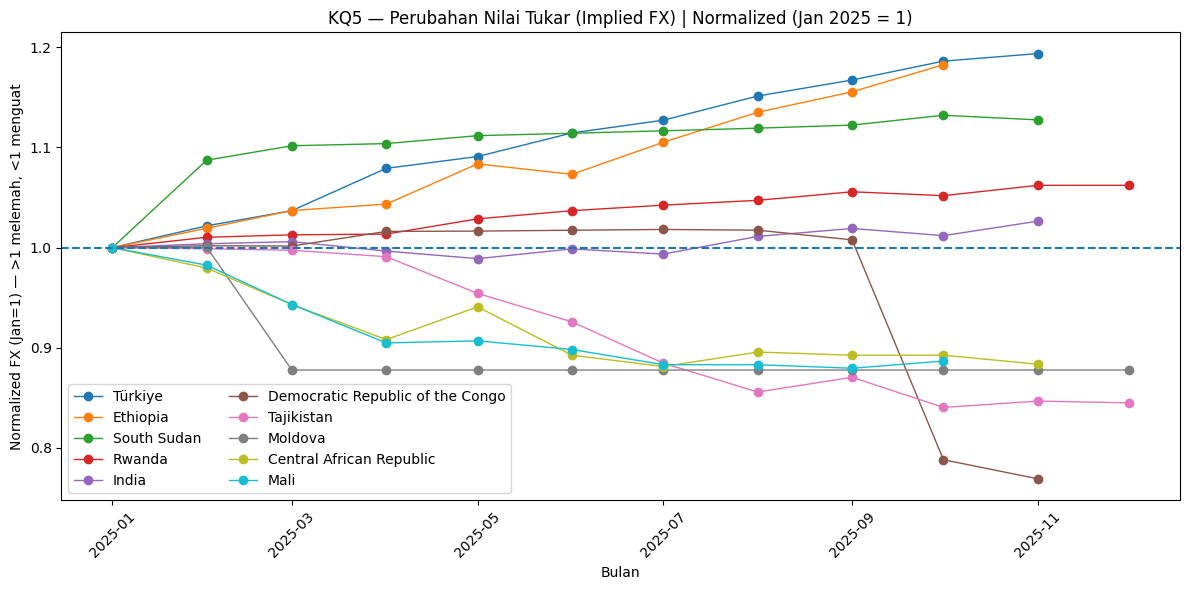

In [ ]:
# Plot time series normalized untuk 10 negara (5 melemah + 5 menguat)
focus_iso3 = pd.concat([top_dep["countryiso3"], top_app["countryiso3"]]).unique().tolist()
plot_df = fx_valid[fx_valid["countryiso3"].isin(focus_iso3)].copy()

plt.figure(figsize=(12,6))
for iso3 in focus_iso3:
    d = plot_df[plot_df["countryiso3"] == iso3].sort_values("month")
    label = d["country"].iloc[0]
    plt.plot(d["month"], d["normalized_rate"], marker="o", linewidth=1, label=label)

plt.axhline(1.0, linestyle="--")
plt.title("KQ5 — Perubahan Nilai Tukar (Implied FX) | Normalized (Jan 2025 = 1)")
plt.xlabel("Bulan")
plt.ylabel("Normalized FX (Jan=1) — >1 melemah, <1 menguat")
plt.xticks(rotation=45)
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

#### Insight KQ5

I. Apa yang diukur

Kita membuat proxy nilai tukar tersirat (implied FX) dari data: price (mata uang lokal) / usdprice (USD).

Lalu kita normalisasi supaya Januari 2025 = 1. Jadi, > 1 = mata uang lokal melemah (depresiasi) dibanding Januari dan < 1 = mata uang lokal menguat (apresiasi) dibanding Januari


II. Temuan utama

1. Depresiasi paling kuat (melemah) sepanjang 2025

Dari tabel “Top Depresiasi”, negara yang paling melemah relatif terhadap Januari adalah:

Türkiye (~+19.37% sampai Nov)

Ethiopia (~+18.26% sampai Oct)

South Sudan (~+12.75% sampai Nov)

Rwanda (~+6.22% sampai Dec)

India (~+2.64% sampai Nov)
Artinya: untuk “nilai yang setara 1 USD”, dibutuhkan lebih banyak mata uang lokal dibanding Januari.

2. Apresiasi paling kuat (menguat) sepanjang 2025

Dari tabel “Top Apresiasi”, yang paling menguat relatif terhadap Januari adalah:

DR Congo (~-23.08% sampai Nov)

Tajikistan (~-15.49% sampai Dec)

Moldova (~-12.22% sampai Dec)

Central African Republic (~-11.63% sampai Nov)

Mali (~-11.32% sampai Oct)
Artinya: “proxy 1 USD” menjadi lebih kecil dibanding Januari (mata uang relatif menguat dalam proxy ini).

3. Ada isu coverage

Ada beberapa negara tidak punya data Januari sehingga tidak bisa dinormalisasi Jan=1 dan dikeluarkan dari perbandingan:

Colombia, Guinea-Bissau, Myanmar, Malawi, Niger, Eswatini

# 6. Untuk kebutuhan restok gula (Sugar) di satu provinsi tertentu, pasar mana yang saat ini memiliki harga paling murah? Jika membeli dari pasar tersebut, berapa besar penghematan yang bisa didapat dibandingkan dengan harga rata-rata provinsi?

Studi Kasus KQ6 – Strategi Restok Gula (Sugar) dengan Analitik Data:

Sebagai seorang pedagang gula yang beroperasi di Provinsi Somali di Ethiopia, tantangan utama adalah menekan biaya pembelian barang agar margin keuntungan tetap terjaga di tengah fluktuasi harga pangan.

Untuk itu, diperlukan cara objektif dan berbasis data guna menentukan pasar mana yang menawarkan harga gula paling murah.

Tools analitik sederhana dapat membantu pedagang mengidentifikasi pasar termurah dan mengoptimalkan strategi restok komoditas pangan.

In [ ]:
# Parameter
TARGET_PROVINCE = "Somali"
TARGET_COMMODITY = "Sugar"

filtered_df = df[
    (df["commodity"] == TARGET_COMMODITY) &
    (df["admin1"] == TARGET_PROVINCE)
].copy()

# Validasi sederhana: pastikan datanya ada
if filtered_df.empty:
    raise ValueError(
        f"Tidak ada data untuk commodity='{TARGET_COMMODITY}' di provinsi='{TARGET_PROVINCE}'. "
        "Coba cek penulisan nama provinsi/komoditas."
    )
# Hitung rata-rata per market (USD
market_avg_price = (
    filtered_df
    .groupby("market")["usdprice"]
    .mean()
    .reset_index(name="avg_market_price")
)

# Hitung rata-rata provinsi
province_avg_price = market_avg_price["avg_market_price"].mean()

# Cari market termurah
cheapest_market_row = market_avg_price.loc[
    market_avg_price["avg_market_price"].idxmin()
]
cheapest_market_name = cheapest_market_row["market"]
cheapest_market_price = cheapest_market_row["avg_market_price"]

# Hitung potensi penghematan
savings_per_unit = province_avg_price - cheapest_market_price

print("=== HASIL ANALISIS RESTOK ===")
print(f"Provinsi           : {TARGET_PROVINCE}")
print(f"Komoditas          : {TARGET_COMMODITY}")
print(f"Market Termurah    : {cheapest_market_name}")
print(f"Harga Termurah (USD): {cheapest_market_price:.4f}")
print(f"Rata-rata Provinsi (USD): {province_avg_price:.4f}")

# Jika savings positif artinya hemat, jika negatif artinya market termurah ternyata di atas rata-rata (jarang, tapi mungkin)
print(f"Potensi Penghematan per Unit (USD): {savings_per_unit:.4f}")

# (Opsional) tampilkan top 5 market termurah untuk referensi alternatif
print("\nTop Market Termurah:")
print(market_avg_price.sort_values("avg_market_price").head(5))

=== HASIL ANALISIS RESTOK ===
Provinsi           : Somali
Komoditas          : Sugar
Market Termurah    : Gode
Harga Termurah (USD): 0.8233
Rata-rata Provinsi (USD): 0.8782
Potensi Penghematan per Unit (USD): 0.0548

Top Market Termurah:
        market  avg_market_price
4         Gode          0.823333
5  Kebri Dehar          0.835000
0      Charati          0.875000
2     Dolo Ado          0.898571
3        Filtu          0.917143


Terdapat Perbedaan Harga Gula Antar Pasar dalam Satu Provinsi

Hasil analisis menunjukkan bahwa harga gula tidak seragam antar pasar di Provinsi Somali. Perbedaan harga ini membuka peluang untuk melakukan optimalisasi biaya pengadaan (restok) dengan memilih pasar yang paling murah. Dengan pendekatan berbasis data, keputusan restok menjadi lebih efisien dan berpotensi meningkatkan margin keuntungan.

# 7. Bagaimana hubungan antara GDP per capita dengan harga pangan (usdprice)? Apakah negara kaya memiliki harga lebih tinggi?

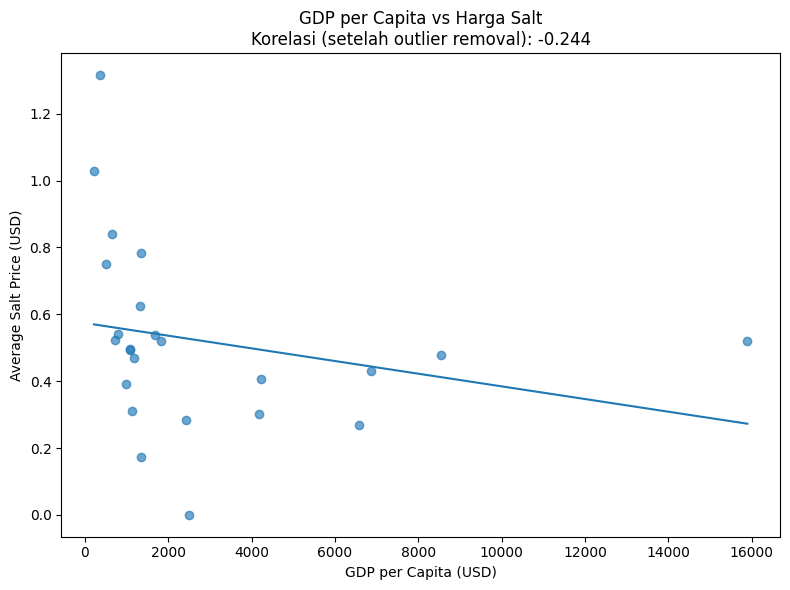

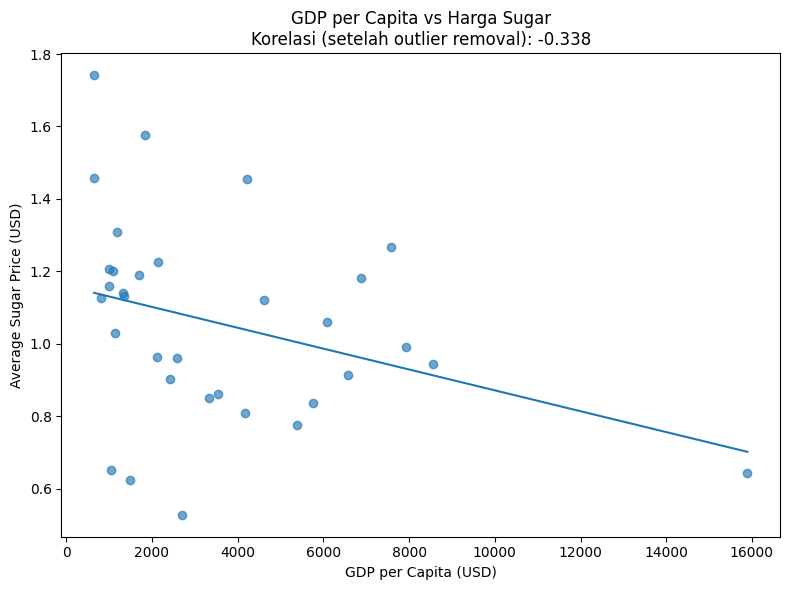

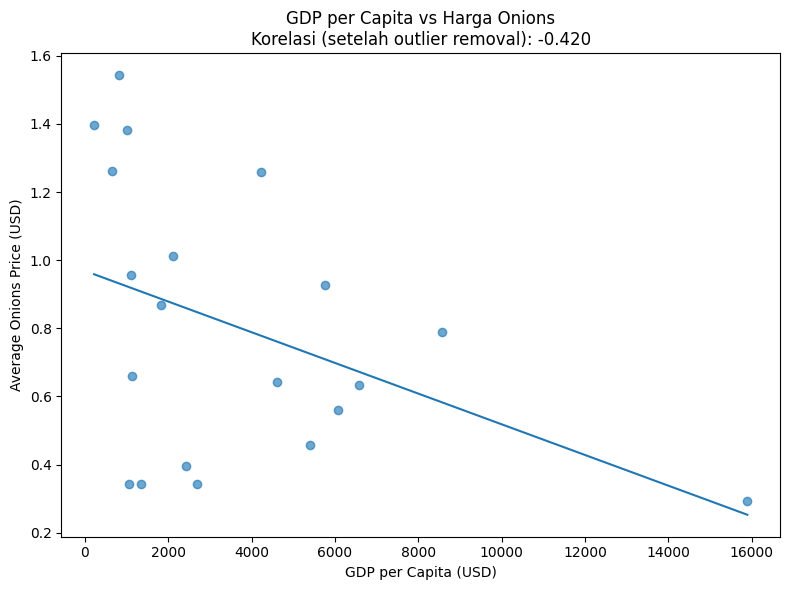

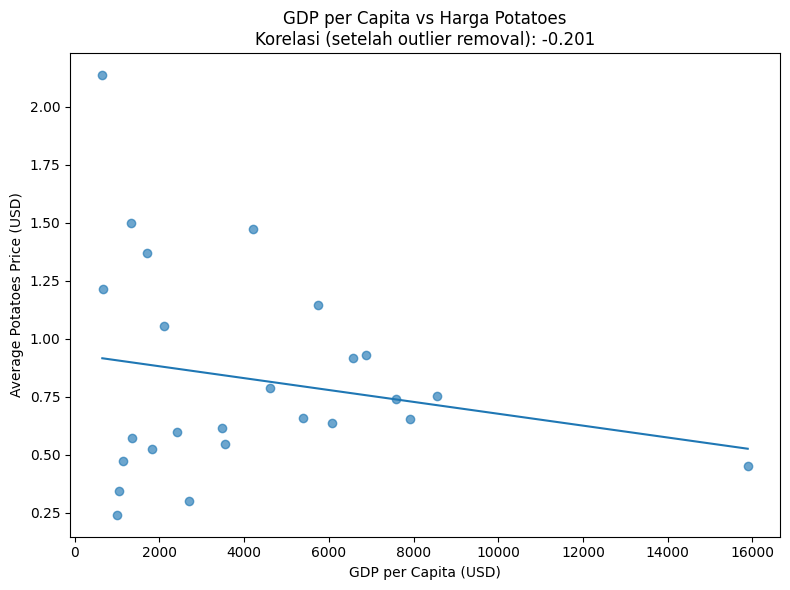

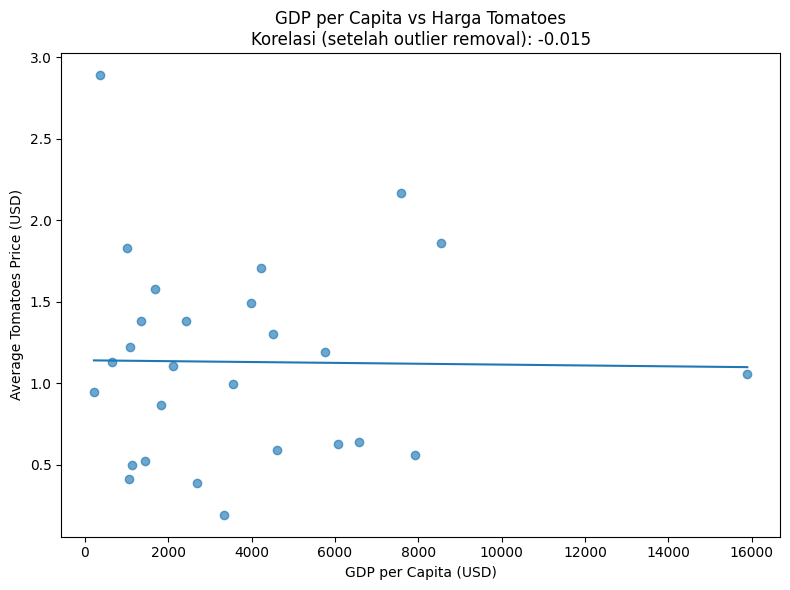

In [ ]:
# Agregasi: rata-rata harga per country & commodity
agg_df = (
    df.groupby(["countryiso3", "country", "commodity"])
      .agg(
          avg_usdprice=("usdprice", "mean"),
          gdp_per_capita_usd=("gdp_per_capita_usd", "mean")
      )
      .reset_index()
)

# Buang baris yang tidak lengkap
agg_df = agg_df.dropna(subset=["avg_usdprice", "gdp_per_capita_usd"]).copy()

# Hapus outlier
def remove_outliers_iqr(data: pd.DataFrame, col: str, k: float = 1.5) -> pd.DataFrame:
    """
    Menghapus outlier berdasarkan IQR.
    k=1.5 adalah standar umum; kalau masih banyak outlier, bisa coba k=2.0
    """
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return data[(data[col] >= lower) & (data[col] <= upper)].copy()

# List komoditas
commodities = agg_df["commodity"].unique()

for com in commodities:
    # Filter data per komoditas
    sub = agg_df[agg_df["commodity"] == com].copy()

    # Remove outlier pada harga (avg_usdprice)
    sub_clean = remove_outliers_iqr(sub, col="avg_usdprice", k=1.5)

    if len(sub_clean) < 3:
        print(f"[SKIP] {com}: data terlalu sedikit setelah outlier removal.")
        continue

# Hitung korelasi GDP vs harga untuk komoditas tertentu
    corr = sub_clean["gdp_per_capita_usd"].corr(sub_clean["avg_usdprice"])

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(
        sub_clean["gdp_per_capita_usd"],
        sub_clean["avg_usdprice"],
        alpha=0.65
    )

    # Trend line (linear regression)
    x = sub_clean["gdp_per_capita_usd"].values
    y = sub_clean["avg_usdprice"].values

    m, b = np.polyfit(x, y, 1)

  # Agar garis regresi rapi, urutkan x
    idx = np.argsort(x)
    plt.plot(x[idx], (m*x + b)[idx])

    # Label & judul
    plt.xlabel("GDP per Capita (USD)")
    plt.ylabel(f"Average {com} Price (USD)")
    plt.title(f"GDP per Capita vs Harga {com}\nKorelasi (setelah outlier removal): {corr:.3f}")

    plt.tight_layout()
    plt.show()

Berdasarkan analisis per komoditas, hubungan antara GDP per capita dan harga pangan bersifat lemah hingga negatif, dan berbeda antar komoditas.

Komoditas garam, gula, bawang, kentang, dan tomat memiliki korelasi negatif, yang mengindikasikan bahwa efisiensi produksi dan distribusi di negara berpendapatan lebih tinggi berkontribusi pada harga pangan yang lebih rendah.

-> Negara yang lebih kaya tidak memiliki harga pangan yang lebih mahal, efisiensi ekonomi justru berperan menekan harga.

# Kesimpulan:
KQ 1.
- Secara global (median USD/kg), harga gabungan cenderung naik di periode bulan Apr–Jun, lalu turun di Jul–Aug, dan pulih kembali di Sep–Nov.

- Per komoditas, Sugar relatif paling tinggi dan stabil sepanjang tahun, sedangkan Salt cenderung paling rendah.

- Lonjakan/penurunan tajam di akhir tahun (khususnya Desember) karena coverage data turun drastis (hanya sedikit negara/market), sehingga lebih mencerminkan kondisi lokal dibanding tren global.

KQ 2.
- Berdasarkan rata-rata harga per market (USD/kg), komoditas dengan median harga tertinggi adalah Sugar, disusul Tomatoes dan Onions; sedangkan Salt memiliki median terendah.

- Dari sisi variasi, Onions dan Tomatoes menunjukkan sebaran paling lebar (heterogen antar-market), artinya perbedaan harga antar wilayah/market cenderung besar.

- Salt dan Sugar cenderung memiliki sebaran lebih rapat, menandakan harga lebih konsisten di banyak market dibanding komoditas lain.

KQ 3.
- Di dalam negara yang sama, terlihat adanya perbedaan harga antar market (ditunjukkan oleh lebar boxplot/IQR), sehingga harga tidak selalu seragam walaupun masih dalam 1 negara.

- Beberapa negara memperlihatkan ketimpangan market yang tinggi (banyak outlier/spread besar), yang mengindikasikan perbedaan akses pasokan, biaya distribusi, atau kondisi lokal antar wilayah.

- Sebaliknya, ada negara yang lebih stabil (spread kecil), yang dapat mengindikasikan pasar yang lebih terintegrasi atau struktur harga yang lebih seragam.

KQ 4.
- Hasil ranking menunjukkan negara “mahal” dan “murah” berbeda-beda per komoditas, namun ada pola berulang: beberapa negara sering muncul di kelompok TOP (mahal), dan beberapa negara lain berulang di BOTTOM (murah).

- Temuan ini memperkuat bahwa level harga pangan sangat dipengaruhi konteks negara/market, termasuk kondisi pasokan, distribusi, dan stabilitas ekonomi.

- Perlu diperhatikan bahwa hasil ranking dapat dipengaruhi jumlah market yang tersedia per negara (coverage). Negara dengan market sangat sedikit bisa menghasilkan nilai ekstrem, sehingga output KQ4 sebaiknya dipakai sebagai indikasi awal untuk investigasi lebih lanjut.

KQ 5. Negara dengan tekanan devaluasi mata uang mengalami kenaikan harga lokal yang lebih tinggi dibanding tren harga global, sementara negara dengan nilai tukar relatif stabil atau terkelola menunjukkan pergerakan harga lokal yang lebih sejalan dengan harga USD, terlepas dari level pendapatannya.

KQ 6. Tools analitik sederhana berbasis data dapat membantu pedagang mengidentifikasi pasar termurah dan mengoptimalkan strategi restok komoditas pangan.

KQ 7. Tingkat pendapatan negara bukan faktor utama penentu harga pangan, dinamika pasokan dan struktur pasar jauh lebih berperan.